In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt #implementing PCA without time series
import matplotlib.cm as cm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn import mixture
from sklearn import metrics
from sklearn import cluster

In [2]:
def rescue_code(function):
    import inspect
    get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))
    # a little helper funtion, in case I accidently delte multiple cells

###### Note: the bitcoin part also contains code for some general functions, also used for etherium.

### Data analysis: bitcoin

In [3]:
bitcoin_dataset = pd.read_csv("/media/artemk/Data/Udacity/ML engineer/6/data/bitcoin_dataset.csv", parse_dates=[0], index_col='Date')
bitcoin_dataset.drop(bitcoin_dataset.index[:297], inplace =True)#in the dataset the some values for this period are missing
bitcoin_dataset.replace(r'\s+', 0, regex=True)

btc_market_price  btc_total_bitcoins  btc_market_cap  \
Date                                                               
2010-08-20          0.066700           3766250.0    2.512089e+05   
2010-08-22          0.066400           3785400.0    2.513506e+05   
2010-08-24          0.066889           3806500.0    2.546130e+05   
2010-08-26          0.066499           3828250.0    2.545748e+05   
2010-08-28          0.065000           3846100.0    2.499965e+05   
2010-08-30          0.069000           3861450.0    2.664400e+05   
2010-09-01          0.064900           3879000.0    2.517471e+05   
2010-09-03          0.063400           3894550.0    2.469145e+05   
2010-09-05          0.062900           3911600.0    2.460396e+05   
2010-09-07          0.061850           3927600.0    2.429221e+05   
2010-09-09          0.062400           3942750.0    2.460276e+05   
2010-09-11          0.062000           3959400.0    2.454828e+05   
2010-09-13          0.062010           3976750.0    2.465983e+05   
2010-09-15          0.175000           3995900.0    6.992825e+05   
2010-09-17          0.060900           4016200.0    2.445866e+05   
2010-09-19          0.062599           4038550.0    2.528092e+05   
2010-09-21          0.063300           4057950.0    2.568682e+05   
2010-09-23          0.063000           4077200.0    2.568636e+05   
2010-09-25          0.062400           4099600.0    2.558150e+05   
2010-09-27          0.062206           4121350.0    2.563727e+05   
2010-09-29          0.062190           4141000.0    2.575288e+05   
2010-10-01          0.061999           4155850.0    2.576585e+05   
2010-10-03          0.061400           4167350.0    2.558753e+05   
2010-10-05          0.063010           4181200.0    2.634574e+05   
2010-10-07          0.063800           4197450.0    2.677973e+05   
2010-10-09          0.120010           4212850.0    5.055841e+05   
2010-10-11          0.130100           4229700.0    5.502840e+05   
2010-10-13          0.095000           4246150.0    4.033842e+05   
2010-10-15          0.119000           4265000.0    5.075350e+05   
2010-10-17          0.104500           4291050.0    4.484147e+05   
...                      ...                 ...             ...   
2017-07-20       2898.188417          16459575.0    4.770295e+10   
2017-07-22       2807.609857          16463500.0    4.622308e+10   
2017-07-24       2751.821029          16467875.0    4.531664e+10   
2017-07-26       2495.028586          16471562.5    4.109702e+10   
2017-07-28       2781.636583          16475362.5    4.582847e+10   
2017-07-30       2745.955417          16479162.5    4.525105e+10   
2017-08-01       2710.413067          16482837.5    4.467530e+10   
2017-08-03       2794.117717          16486462.5    4.606512e+10   
2017-08-05       3218.115017          16490912.5    5.306965e+10   
2017-08-07       3407.226833          16494575.0    5.620076e+10   
2017-08-09       3357.326317          16498350.0    5.539034e+10   
2017-08-11       3632.506667          16501825.0    5.994299e+10   
2017-08-13       4125.548020          16505362.5    6.809367e+10   
2017-08-15       4217.028329          16508887.5    6.961845e+10   
2017-08-17       4328.725717          16512750.0    7.147917e+10   
2017-08-19       4222.662214          16516500.0    6.974360e+10   
2017-08-21       4043.722000          16519562.5    6.680052e+10   
2017-08-23       4174.950000          16522662.5    6.898129e+10   
2017-08-25       4363.054450          16525187.5    7.210029e+10   
2017-08-27       4354.308333          16528437.5    7.196991e+10   
2017-08-29       4607.985450          16531912.5    7.617881e+10   
2017-08-31       4748.255000          16536050.0    7.851738e+10   
2017-09-02       4580.387480          16540275.0    7.576087e+10   
2017-09-04       4344.098317          16544387.5    7.187045e+10   
2017-09-06       4641.822017          16548875.0    7.681693e+10   
2017-09-08       4310.750183          16553262.5    7.135698e+10   


In [4]:
n_records = len(bitcoin_dataset.index)
print (n_records)

1293


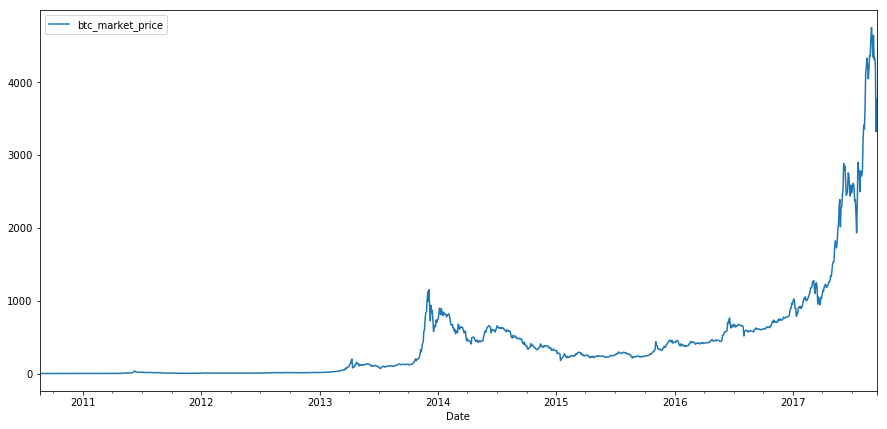

In [5]:
bitcoin_dataset.plot(y='btc_market_price', figsize={7, 15})
plt.show()

In [6]:
bitcoin_dataset.corr(method='pearson', min_periods=1)

btc_market_price  \
btc_market_price                                            1.000000   
btc_total_bitcoins                                          0.569741   
btc_market_cap                                              0.997670   
btc_trade_volume                                            0.711037   
btc_blocks_size                                             0.787023   
btc_avg_block_size                                          0.659691   
btc_n_orphaned_blocks                                       0.008175   
btc_n_transactions_per_block                                0.642210   
btc_median_confirmation_time                                0.329735   
btc_hash_rate                                               0.913443   
btc_difficulty                                              0.916856   
btc_miners_revenue                                          0.948248   
btc_transaction_fees                                        0.785849   
btc_cost_per_transaction_percent                           -0.232246   
btc_cost_per_transaction                                    0.429482   
btc_n_unique_addresses                                      0.708257   
btc_n_transactions                                          0.659343   
btc_n_transactions_total                                    0.794754   
btc_n_transactions_excluding_popular                        0.660054   
btc_n_transactions_excluding_chains_longer_than...          0.691950   
btc_output_volume                                           0.116885   
btc_estimated_transaction_volume                            0.072611   
btc_estimated_transaction_volume_usd                        0.937168   

                                                    btc_total_bitcoins  \
btc_market_price                                              0.569741   
btc_total_bitcoins                                            1.000000   
btc_market_cap                                                0.554487   
btc_trade_volume                                              0.434812   
btc_blocks_size                                               0.811286   
btc_avg_block_size                                            0.868671   
btc_n_orphaned_blocks                                         0.310280   
btc_n_transactions_per_block                                  0.847918   
btc_median_confirmation_time                                  0.570562   
btc_hash_rate                                                 0.585837   
btc_difficulty                                                0.595188   
btc_miners_revenue                                            0.603624   
btc_transaction_fees                                          0.497226   
btc_cost_per_transaction_percent                             -0.619461   
btc_cost_per_transaction                                      0.229959   
btc_n_unique_addresses                                        0.863242   
btc_n_transactions                                            0.853590   
btc_n_transactions_total                                      0.816190   
btc_n_transactions_excluding_popular                          0.835455   
btc_n_transactions_excluding_chains_longer_than...            0.815947   
btc_output_volume                                             0.225939   
btc_estimated_transaction_volume                              0.160028   
btc_estimated_transaction_volume_usd                          0.539678   

                                                    btc_market_cap  \
btc_market_price                                          0.997670   
btc_total_bitcoins                                        0.554487   
btc_market_cap                                            1.000000   
btc_trade_volume                                          0.702145   
btc_blocks_size                                           0.795569   
btc_avg_block_size                                        0.663922   
btc_n_orphaned_blocks                                   

In [7]:
bitcoin_dataset_short=bitcoin_dataset.copy() #droping time series and a column with empty values to ensure PCA-compatability
bitcoin_dataset_short.drop(['btc_n_orphaned_blocks', "btc_cost_per_transaction_percent",
                                                      "btc_output_volume", "btc_estimated_transaction_volume", "btc_trade_volume"], axis= 1, inplace=True)

In [8]:
bitcoin_dataset_short.dtypes

btc_market_price                                       float64
btc_total_bitcoins                                     float64
btc_market_cap                                         float64
btc_blocks_size                                        float64
btc_avg_block_size                                     float64
btc_n_transactions_per_block                           float64
btc_median_confirmation_time                           float64
btc_hash_rate                                          float64
btc_difficulty                                         float64
btc_miners_revenue                                     float64
btc_transaction_fees                                   float64
btc_cost_per_transaction                               float64
btc_n_unique_addresses                                 float64
btc_n_transactions                                     float64
btc_n_transactions_total                               float64
btc_n_transactions_excluding_popular                   

In [9]:
#bitcoin_dataset_short=bitcoin_dataset.copy() #droping time series and a column with empty values to ensure PCA-compatability
#bitcoin_dataset_short.drop(["btc_trade_volume"],axis=1,inplace=True)

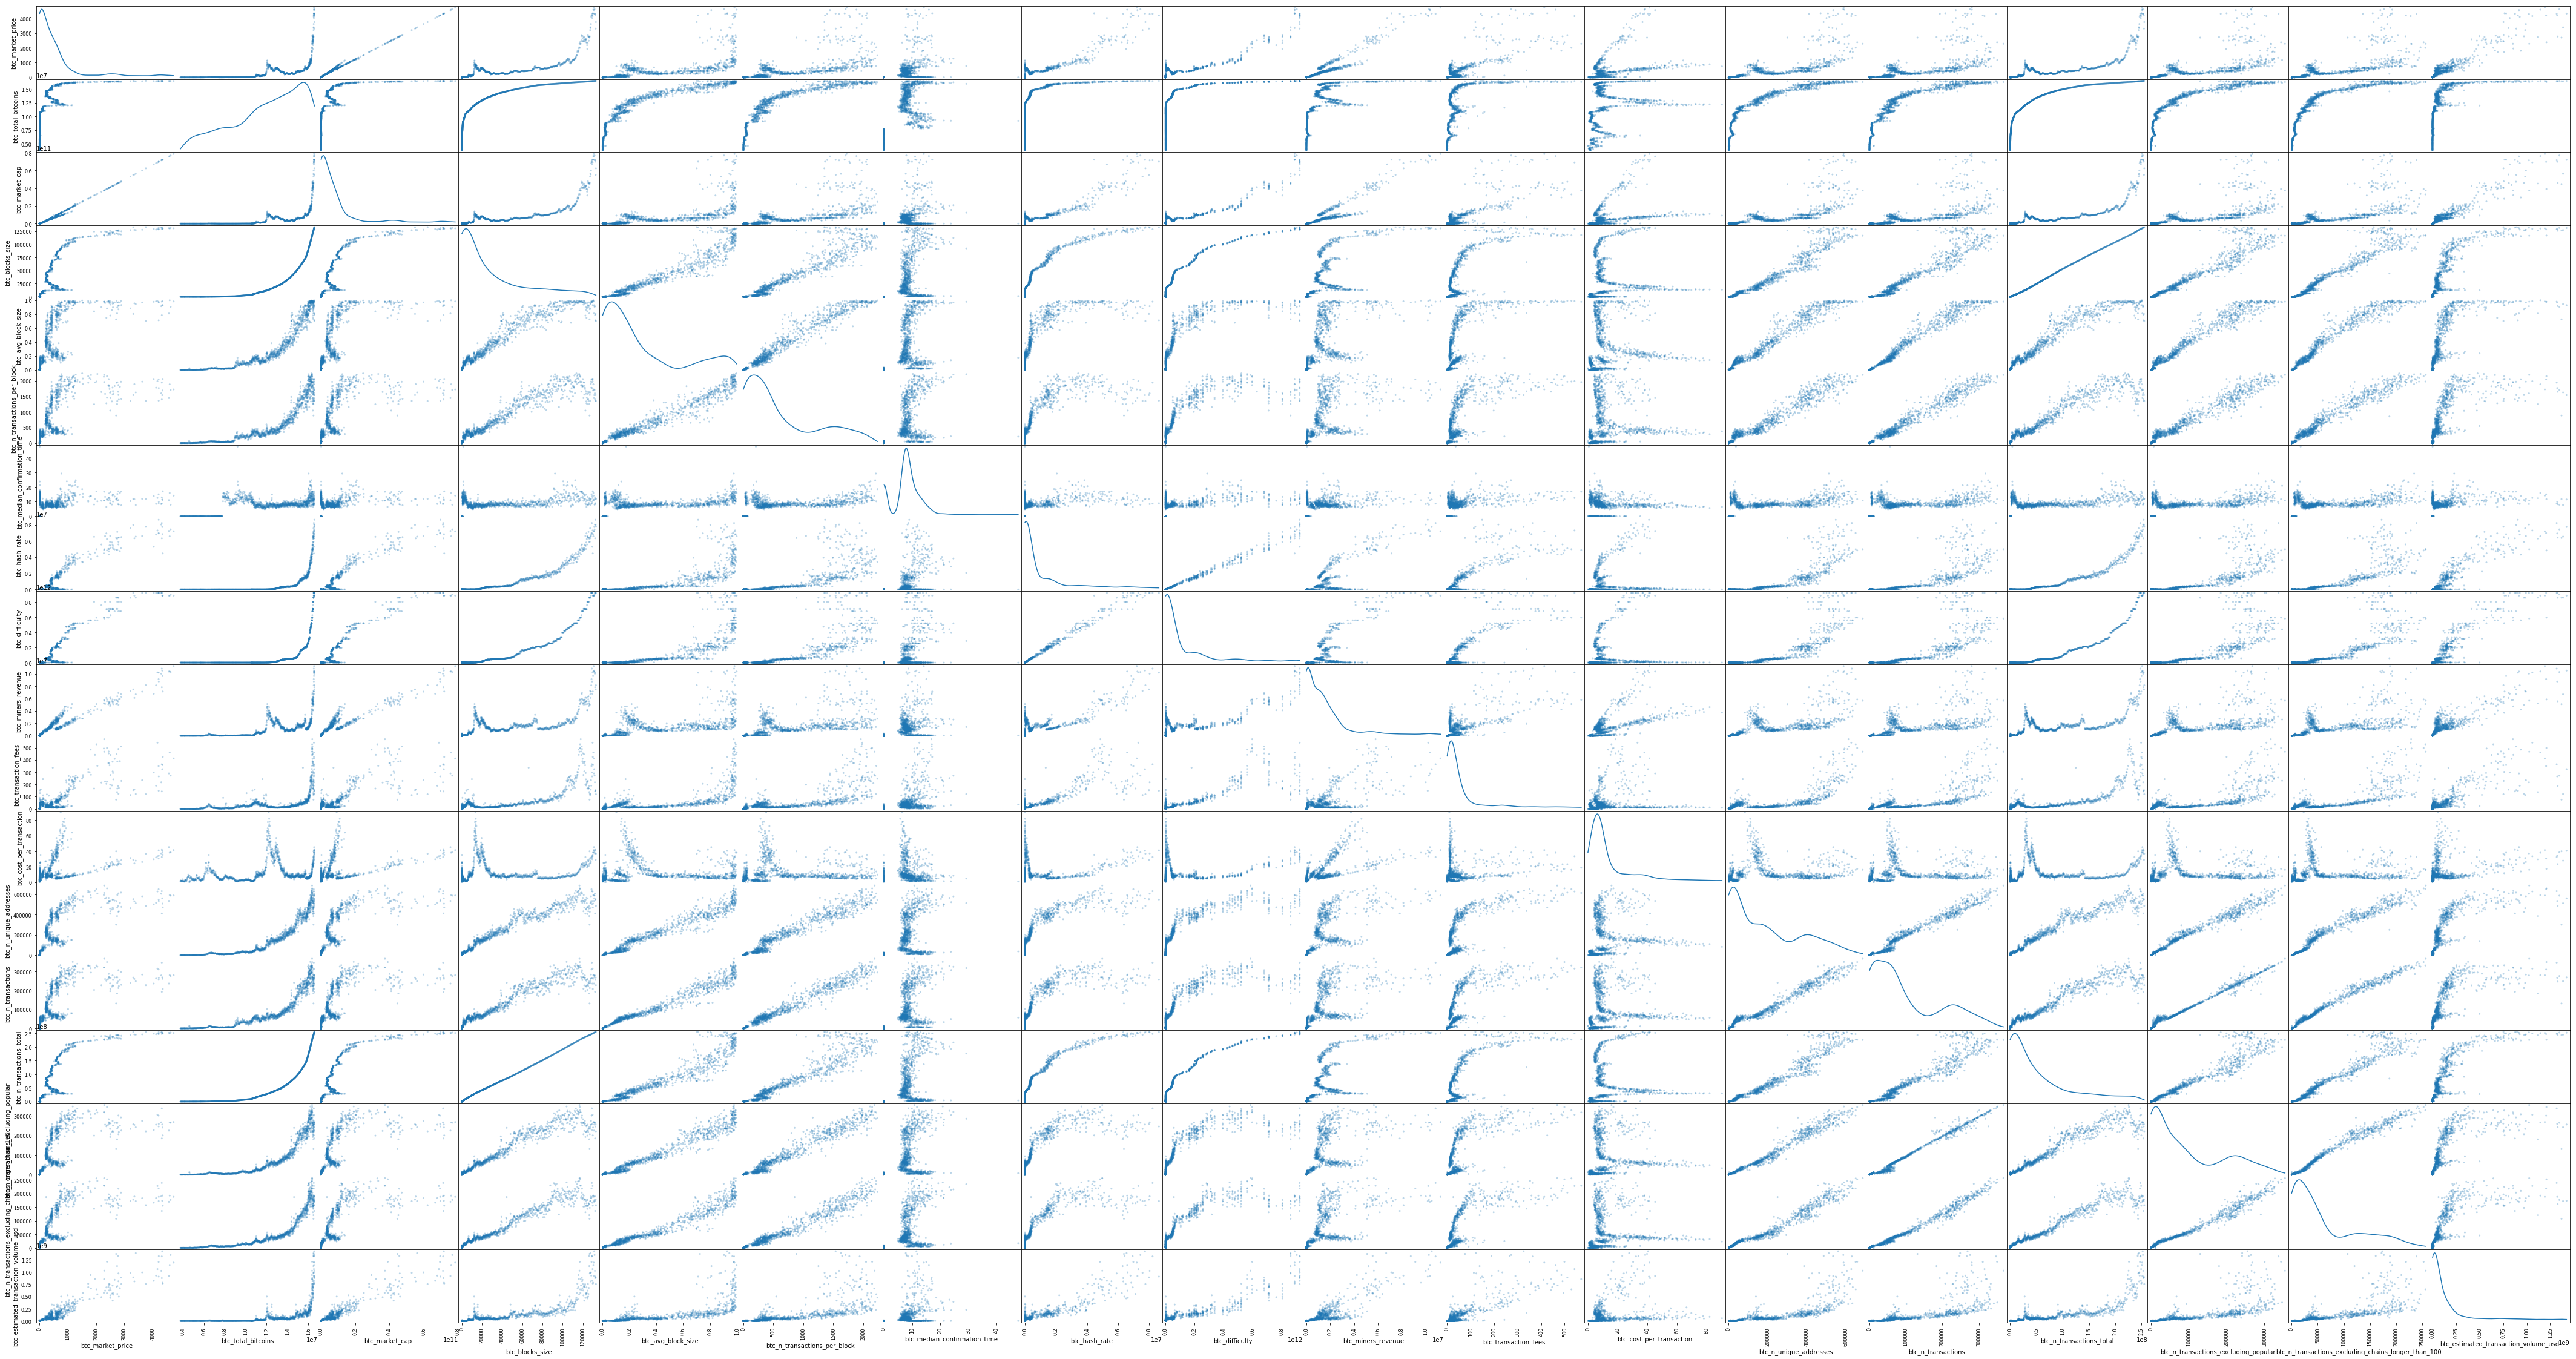

In [10]:
pd.plotting.scatter_matrix(bitcoin_dataset_short, alpha = 0.3, figsize = (75,40), diagonal = 'kde')
plt.show()
plt.savefig('/media/artemk/Data/Udacity/ML engineer/6/graph1.png', dpi=300, bbox_inches='tight')

In [11]:
display(bitcoin_dataset_short.head(n=1))

btc_market_price  btc_total_bitcoins  btc_market_cap  \
Date                                                               
2010-08-20            0.0667           3766250.0      251208.875   

            btc_blocks_size  btc_avg_block_size  btc_n_transactions_per_block  \
Date                                                                            
2010-08-20              1.0            0.000649                           1.0   

            btc_median_confirmation_time  btc_hash_rate  btc_difficulty  \
Date                                                                      
2010-08-20                           0.0       0.004249      511.773534   

            btc_miners_revenue  btc_transaction_fees  \
Date                                                   
2010-08-20             556.945                   0.0   

            btc_cost_per_transaction  btc_n_unique_addresses  \
Date                                                           
2010-08-20                  1.399359                   433.0   

            btc_n_transactions  btc_n_transactions_total  \
Date                                                       
2010-08-20               398.0                  105951.0   

            btc_n_transactions_excluding_popular  \
Date                                               
2010-08-20                                 398.0   

            btc_n_transactions_excluding_chains_longer_than_100  \
Date                                                              
2010-08-20                                              398.0     

            btc_estimated_transaction_volume_usd  
Date                                              
2010-08-20                                1410.0

In [12]:
#from mySSA import mySSA

In [13]:
#DTW for comparison of different modules

#### Differencing: bitcoin

In [14]:
#a function to calculate discriptive statistics and test stationarity for each feature of the timeseries
from statsmodels.tsa.stattools import adfuller #adapted from [29]
def test_stationarity(timeseries):
    
    #Determing timeseries statistics
    rolmean = timeseries.rolling(window=12,center=False).mean() #rolling mean
    rolstd = timeseries.rolling(window=12,center=False).std() #rolling standard diviation

    #Plot timeseries statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
     
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)   


/home/artemk/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


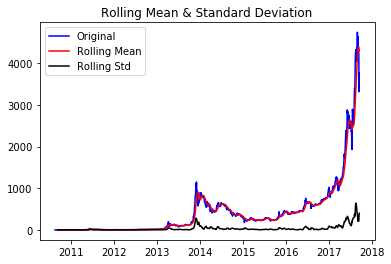

Results of Dickey-Fuller Test:
Test Statistic                    4.662674
p-value                           1.000000
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


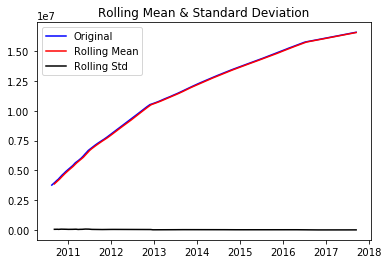

Results of Dickey-Fuller Test:
Test Statistic                   -4.020629
p-value                           0.001306
#Lags Used                       15.000000
Number of Observations Used    1277.000000
Critical Value (1%)              -3.435481
Critical Value (5%)              -2.863806
Critical Value (10%)             -2.567976
dtype: float64


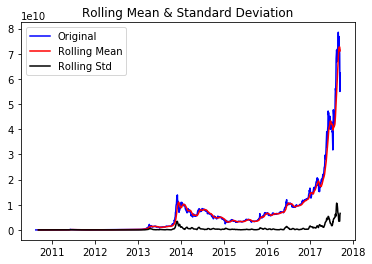

Results of Dickey-Fuller Test:
Test Statistic                    6.178978
p-value                           1.000000
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


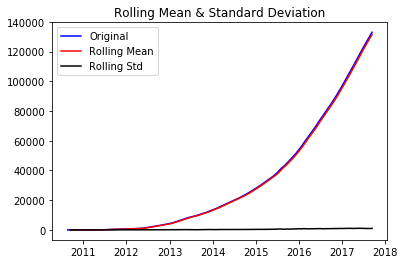

Results of Dickey-Fuller Test:
Test Statistic                   -0.144587
p-value                           0.944812
#Lags Used                       22.000000
Number of Observations Used    1270.000000
Critical Value (1%)              -3.435510
Critical Value (5%)              -2.863818
Critical Value (10%)             -2.567983
dtype: float64


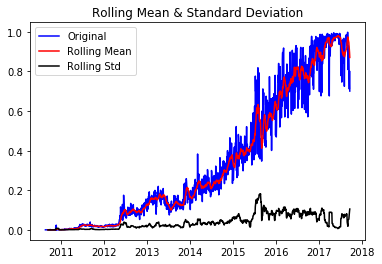

Results of Dickey-Fuller Test:
Test Statistic                    0.315001
p-value                           0.978022
#Lags Used                       21.000000
Number of Observations Used    1271.000000
Critical Value (1%)              -3.435505
Critical Value (5%)              -2.863817
Critical Value (10%)             -2.567982
dtype: float64


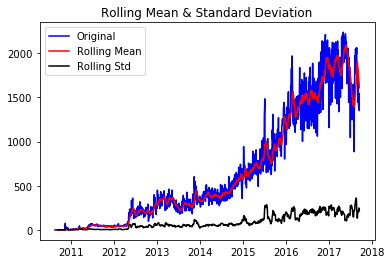

Results of Dickey-Fuller Test:
Test Statistic                   -0.193711
p-value                           0.939267
#Lags Used                       20.000000
Number of Observations Used    1272.000000
Critical Value (1%)              -3.435501
Critical Value (5%)              -2.863815
Critical Value (10%)             -2.567981
dtype: float64


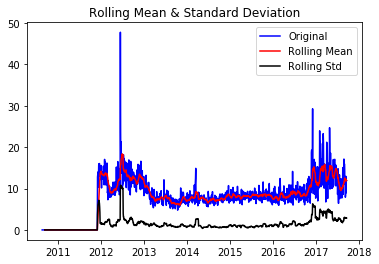

Results of Dickey-Fuller Test:
Test Statistic                   -2.521074
p-value                           0.110431
#Lags Used                       11.000000
Number of Observations Used    1281.000000
Critical Value (1%)              -3.435465
Critical Value (5%)              -2.863799
Critical Value (10%)             -2.567973
dtype: float64


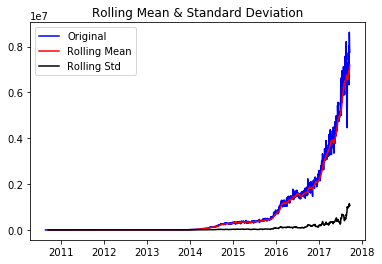

Results of Dickey-Fuller Test:
Test Statistic                   10.638583
p-value                           1.000000
#Lags Used                       22.000000
Number of Observations Used    1270.000000
Critical Value (1%)              -3.435510
Critical Value (5%)              -2.863818
Critical Value (10%)             -2.567983
dtype: float64


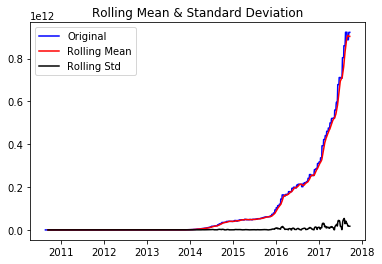

Results of Dickey-Fuller Test:
Test Statistic                    7.291499
p-value                           1.000000
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


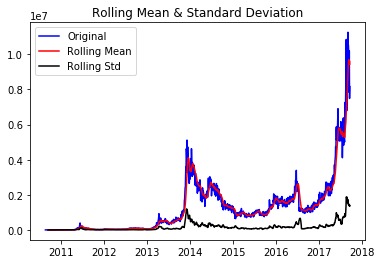

Results of Dickey-Fuller Test:
Test Statistic                    1.201419
p-value                           0.995996
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


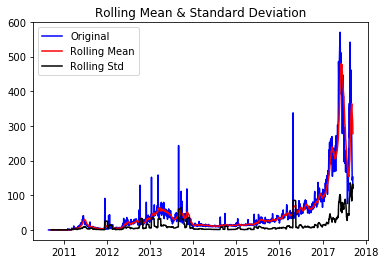

Results of Dickey-Fuller Test:
Test Statistic                   -1.561381
p-value                           0.502958
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


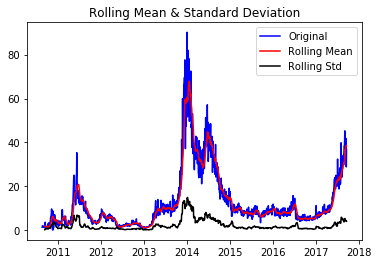

Results of Dickey-Fuller Test:
Test Statistic                   -2.890218
p-value                           0.046497
#Lags Used                       21.000000
Number of Observations Used    1271.000000
Critical Value (1%)              -3.435505
Critical Value (5%)              -2.863817
Critical Value (10%)             -2.567982
dtype: float64


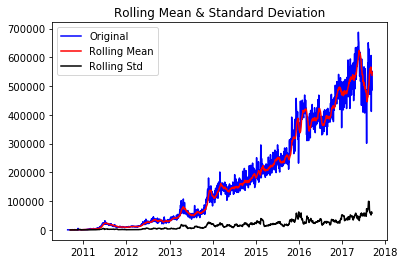

Results of Dickey-Fuller Test:
Test Statistic                    0.613782
p-value                           0.987950
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


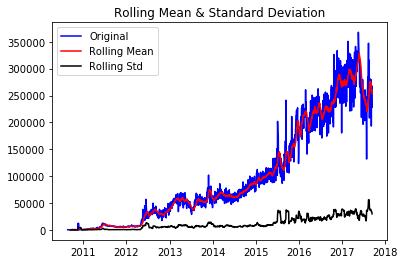

Results of Dickey-Fuller Test:
Test Statistic                    0.119092
p-value                           0.967341
#Lags Used                       20.000000
Number of Observations Used    1272.000000
Critical Value (1%)              -3.435501
Critical Value (5%)              -2.863815
Critical Value (10%)             -2.567981
dtype: float64


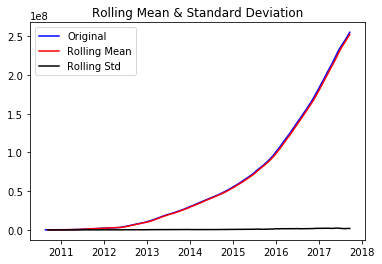

Results of Dickey-Fuller Test:
Test Statistic                    0.792599
p-value                           0.991516
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


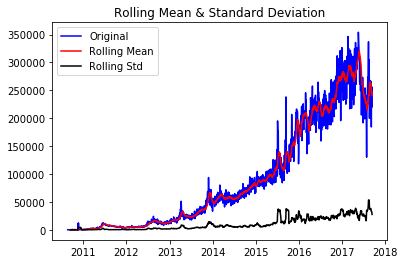

Results of Dickey-Fuller Test:
Test Statistic                    0.200773
p-value                           0.972305
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


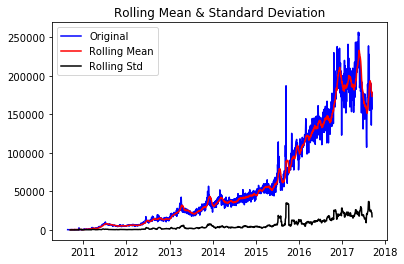

Results of Dickey-Fuller Test:
Test Statistic                    0.077034
p-value                           0.964458
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


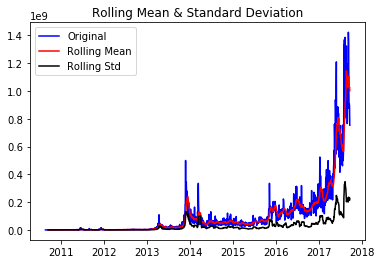

Results of Dickey-Fuller Test:
Test Statistic                    2.238637
p-value                           0.998913
#Lags Used                       22.000000
Number of Observations Used    1270.000000
Critical Value (1%)              -3.435510
Critical Value (5%)              -2.863818
Critical Value (10%)             -2.567983
dtype: float64


btc_market_price                                       None
btc_total_bitcoins                                     None
btc_market_cap                                         None
btc_blocks_size                                        None
btc_avg_block_size                                     None
btc_n_transactions_per_block                           None
btc_median_confirmation_time                           None
btc_hash_rate                                          None
btc_difficulty                                         None
btc_miners_revenue                                     None
btc_transaction_fees                                   None
btc_cost_per_transaction                               None
btc_n_unique_addresses                                 None
btc_n_transactions                                     None
btc_n_transactions_total                               None
btc_n_transactions_excluding_popular                   None
btc_n_transactions_excluding_chains_long

In [15]:
bitcoin_dataset_short.apply(test_stationarity, axis=0) #applying the stationarity test for each feature

In [16]:
bitcoin_dataset_short_log = bitcoin_dataset_short.apply(np.log, axis=0).replace(to_replace=[-np.inf], value=0)
#we log-transform replace -inf btc_n_transactions_per_block and btc_transaction_fees

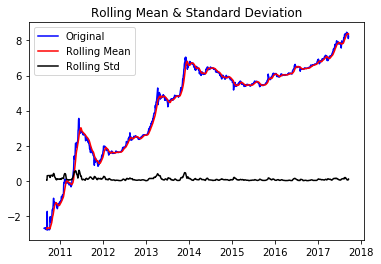

Results of Dickey-Fuller Test:
Test Statistic                   -2.619747
p-value                           0.088984
#Lags Used                       16.000000
Number of Observations Used    1276.000000
Critical Value (1%)              -3.435485
Critical Value (5%)              -2.863808
Critical Value (10%)             -2.567977
dtype: float64


In [17]:
test_stationarity(bitcoin_dataset_short_log["btc_market_price"])
#we test the stationarity once again to see the results of the log transformation

In [18]:
bitcoin_dataset_short_log_diff = bitcoin_dataset_short_log.diff(periods=2, axis=0)
#applying 2nd order differencing for the dataset

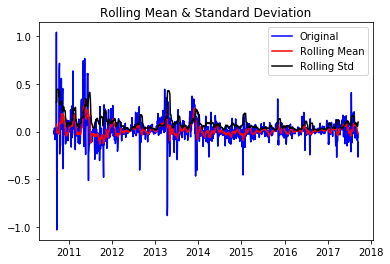

Results of Dickey-Fuller Test:
Test Statistic                -6.158606e+00
p-value                        7.265703e-08
#Lags Used                     2.200000e+01
Number of Observations Used    1.268000e+03
Critical Value (1%)           -3.435518e+00
Critical Value (5%)           -2.863822e+00
Critical Value (10%)          -2.567985e+00
dtype: float64


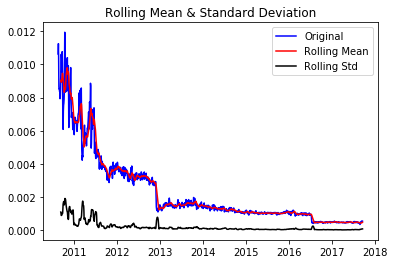

Results of Dickey-Fuller Test:
Test Statistic                   -3.045622
p-value                           0.030848
#Lags Used                       22.000000
Number of Observations Used    1268.000000
Critical Value (1%)              -3.435518
Critical Value (5%)              -2.863822
Critical Value (10%)             -2.567985
dtype: float64


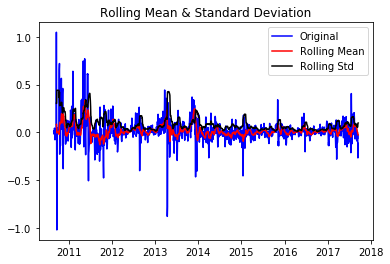

Results of Dickey-Fuller Test:
Test Statistic                -6.069483e+00
p-value                        1.160110e-07
#Lags Used                     2.200000e+01
Number of Observations Used    1.268000e+03
Critical Value (1%)           -3.435518e+00
Critical Value (5%)           -2.863822e+00
Critical Value (10%)          -2.567985e+00
dtype: float64


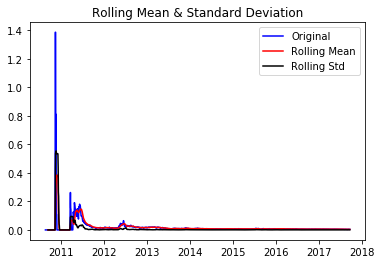

Results of Dickey-Fuller Test:
Test Statistic                -5.754495e+00
p-value                        5.862456e-07
#Lags Used                     2.200000e+01
Number of Observations Used    1.268000e+03
Critical Value (1%)           -3.435518e+00
Critical Value (5%)           -2.863822e+00
Critical Value (10%)          -2.567985e+00
dtype: float64


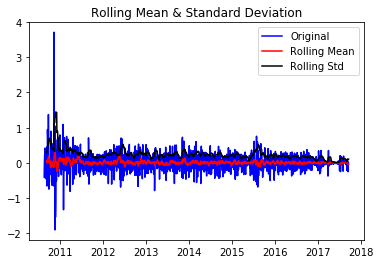

Results of Dickey-Fuller Test:
Test Statistic                -8.075747e+00
p-value                        1.507205e-12
#Lags Used                     2.300000e+01
Number of Observations Used    1.267000e+03
Critical Value (1%)           -3.435522e+00
Critical Value (5%)           -2.863824e+00
Critical Value (10%)          -2.567986e+00
dtype: float64


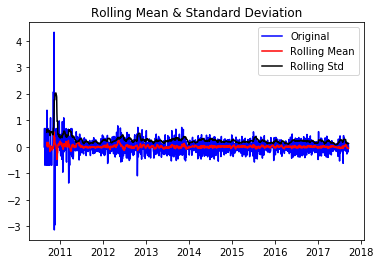

Results of Dickey-Fuller Test:
Test Statistic                -8.987310e+00
p-value                        7.043937e-15
#Lags Used                     2.300000e+01
Number of Observations Used    1.267000e+03
Critical Value (1%)           -3.435522e+00
Critical Value (5%)           -2.863824e+00
Critical Value (10%)          -2.567986e+00
dtype: float64


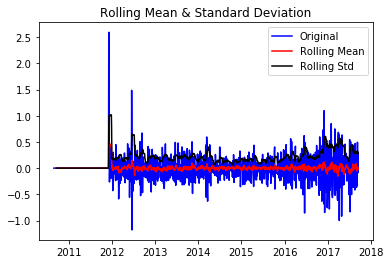

Results of Dickey-Fuller Test:
Test Statistic                -9.170306e+00
p-value                        2.398329e-15
#Lags Used                     1.700000e+01
Number of Observations Used    1.273000e+03
Critical Value (1%)           -3.435497e+00
Critical Value (5%)           -2.863813e+00
Critical Value (10%)          -2.567980e+00
dtype: float64


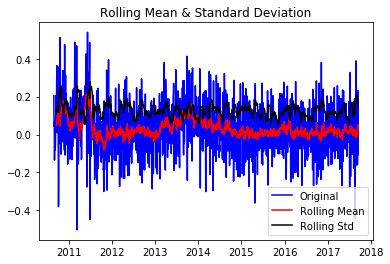

Results of Dickey-Fuller Test:
Test Statistic                   -3.794297
p-value                           0.002966
#Lags Used                       22.000000
Number of Observations Used    1268.000000
Critical Value (1%)              -3.435518
Critical Value (5%)              -2.863822
Critical Value (10%)             -2.567985
dtype: float64


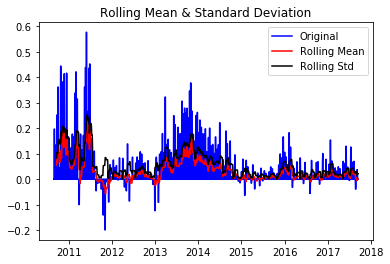

Results of Dickey-Fuller Test:
Test Statistic                   -4.084829
p-value                           0.001026
#Lags Used                       21.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


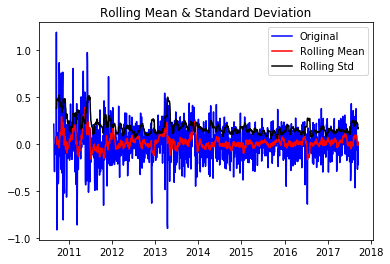

Results of Dickey-Fuller Test:
Test Statistic                -6.517398e+00
p-value                        1.062880e-08
#Lags Used                     2.300000e+01
Number of Observations Used    1.267000e+03
Critical Value (1%)           -3.435522e+00
Critical Value (5%)           -2.863824e+00
Critical Value (10%)          -2.567986e+00
dtype: float64


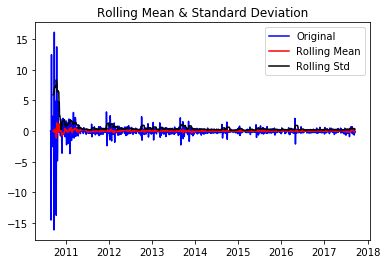

Results of Dickey-Fuller Test:
Test Statistic                -7.784349e+00
p-value                        8.255797e-12
#Lags Used                     2.300000e+01
Number of Observations Used    1.267000e+03
Critical Value (1%)           -3.435522e+00
Critical Value (5%)           -2.863824e+00
Critical Value (10%)          -2.567986e+00
dtype: float64


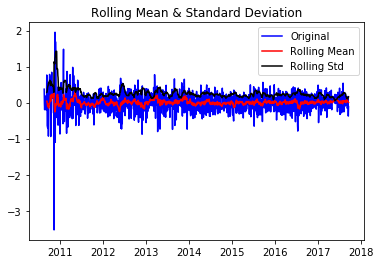

Results of Dickey-Fuller Test:
Test Statistic                -6.979242e+00
p-value                        8.274028e-10
#Lags Used                     2.300000e+01
Number of Observations Used    1.267000e+03
Critical Value (1%)           -3.435522e+00
Critical Value (5%)           -2.863824e+00
Critical Value (10%)          -2.567986e+00
dtype: float64


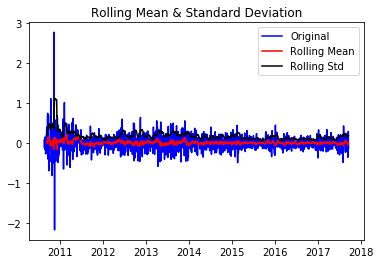

Results of Dickey-Fuller Test:
Test Statistic                -6.258036e+00
p-value                        4.290793e-08
#Lags Used                     2.100000e+01
Number of Observations Used    1.269000e+03
Critical Value (1%)           -3.435514e+00
Critical Value (5%)           -2.863820e+00
Critical Value (10%)          -2.567984e+00
dtype: float64


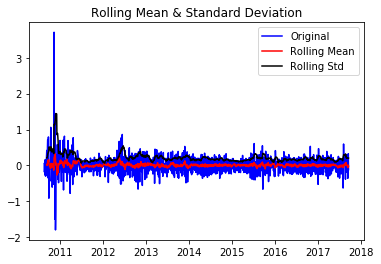

Results of Dickey-Fuller Test:
Test Statistic                -8.957829e+00
p-value                        8.380360e-15
#Lags Used                     2.100000e+01
Number of Observations Used    1.269000e+03
Critical Value (1%)           -3.435514e+00
Critical Value (5%)           -2.863820e+00
Critical Value (10%)          -2.567984e+00
dtype: float64


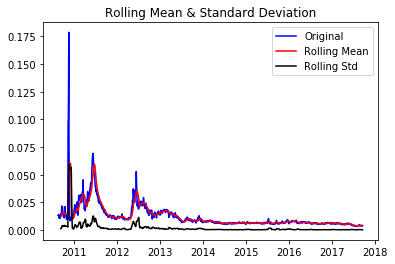

Results of Dickey-Fuller Test:
Test Statistic                   -2.947509
p-value                           0.040096
#Lags Used                       22.000000
Number of Observations Used    1268.000000
Critical Value (1%)              -3.435518
Critical Value (5%)              -2.863822
Critical Value (10%)             -2.567985
dtype: float64


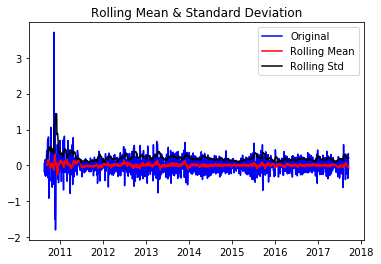

Results of Dickey-Fuller Test:
Test Statistic                -9.662387e+00
p-value                        1.342741e-16
#Lags Used                     2.100000e+01
Number of Observations Used    1.269000e+03
Critical Value (1%)           -3.435514e+00
Critical Value (5%)           -2.863820e+00
Critical Value (10%)          -2.567984e+00
dtype: float64


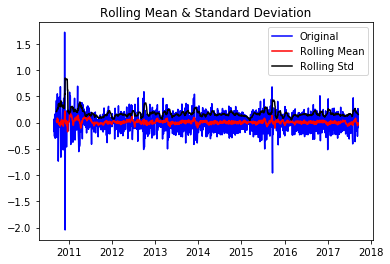

Results of Dickey-Fuller Test:
Test Statistic                -7.941473e+00
p-value                        3.305061e-12
#Lags Used                     2.200000e+01
Number of Observations Used    1.268000e+03
Critical Value (1%)           -3.435518e+00
Critical Value (5%)           -2.863822e+00
Critical Value (10%)          -2.567985e+00
dtype: float64


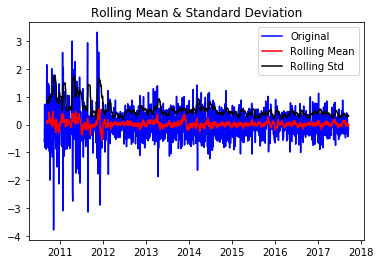

Results of Dickey-Fuller Test:
Test Statistic                -8.665168e+00
p-value                        4.705835e-14
#Lags Used                     2.100000e+01
Number of Observations Used    1.269000e+03
Critical Value (1%)           -3.435514e+00
Critical Value (5%)           -2.863820e+00
Critical Value (10%)          -2.567984e+00
dtype: float64


btc_market_price                                       None
btc_total_bitcoins                                     None
btc_market_cap                                         None
btc_blocks_size                                        None
btc_avg_block_size                                     None
btc_n_transactions_per_block                           None
btc_median_confirmation_time                           None
btc_hash_rate                                          None
btc_difficulty                                         None
btc_miners_revenue                                     None
btc_transaction_fees                                   None
btc_cost_per_transaction                               None
btc_n_unique_addresses                                 None
btc_n_transactions                                     None
btc_n_transactions_total                               None
btc_n_transactions_excluding_popular                   None
btc_n_transactions_excluding_chains_long

In [19]:
bitcoin_dataset_short_log_diff.dropna(inplace=True)
bitcoin_dataset_short_log_diff.apply(test_stationarity, axis=0)
#we test the stationarity once again to see the results of the differencing

#### PCA and unsupervised learning: bitcoin

In [20]:
def pca_results(input_data, pca): #adapted from [37]
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = input_data.keys())
    components.index = dimensions
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [21]:
pca = PCA(n_components=2, random_state=0)
pca.fit(bitcoin_dataset_short_log_diff)

# Generate PCA results plot
bitcoin_pca_results = pca_results(bitcoin_dataset_short_log_diff, pca)

In [22]:
print (bitcoin_pca_results)

             Explained Variance  btc_market_price  btc_total_bitcoins  \
Dimension 1              0.5766            0.0014              0.0000   
Dimension 2              0.1893            0.0534              0.0002   

             btc_market_cap  btc_blocks_size  btc_avg_block_size  \
Dimension 1          0.0014          -0.0001             -0.0305   
Dimension 2          0.0540           0.0154              0.2496   

             btc_n_transactions_per_block  btc_median_confirmation_time  \
Dimension 1                       -0.0036                       -0.0097   
Dimension 2                        0.0584                        0.0440   

             btc_hash_rate  btc_difficulty  btc_miners_revenue  \
Dimension 1        -0.0028          0.0042             -0.0075   
Dimension 2        -0.0057         -0.0013              0.0519   

             btc_transaction_fees  btc_cost_per_transaction  \
Dimension 1               -0.9954                    0.0301   
Dimension 2             

In [23]:
bitcoin_dataset_pca = pca.transform(bitcoin_dataset_short_log_diff)

In [24]:
for possible_clusters_number in range(2,20): #calculates silhouette score for different number of clusters
    clusterer = mixture.GaussianMixture(n_components=possible_clusters_number, random_state=0).fit(bitcoin_dataset_pca)  
    preds = clusterer.predict(bitcoin_dataset_pca) 
    centers = clusterer.means_
    score = metrics.silhouette_score(bitcoin_dataset_pca, preds)
    print ("For n_clusters =", possible_clusters_number,"the average silhouette_score is :", score)

For n_clusters = 2 the average silhouette_score is : 0.596713919707
For n_clusters = 3 the average silhouette_score is : 0.554458167274
For n_clusters = 4 the average silhouette_score is : 0.225082884597
For n_clusters = 5 the average silhouette_score is : 0.447652346028
For n_clusters = 6 the average silhouette_score is : 0.0762194648566
For n_clusters = 7 the average silhouette_score is : 0.273651082252
For n_clusters = 8 the average silhouette_score is : 0.275888600891
For n_clusters = 9 the average silhouette_score is : 0.329123839963
For n_clusters = 10 the average silhouette_score is : 0.329118955841
For n_clusters = 11 the average silhouette_score is : 0.288354576806
For n_clusters = 12 the average silhouette_score is : 0.310128031765
For n_clusters = 13 the average silhouette_score is : 0.322788412734
For n_clusters = 14 the average silhouette_score is : 0.31822538645
For n_clusters = 15 the average silhouette_score is : 0.290727814239
For n_clusters = 16 the average silhouette

In [25]:
for possible_clusters_number in range(2,20):
    clusterer = cluster.KMeans(n_clusters=possible_clusters_number, random_state=0).fit(bitcoin_dataset_pca)
    preds = clusterer.predict(bitcoin_dataset_pca)
    score = metrics.silhouette_score(bitcoin_dataset_pca, preds)
    print ("For n_clusters =", possible_clusters_number,"the average silhouette_score is :", score)

For n_clusters = 2 the average silhouette_score is : 0.929930790397
For n_clusters = 3 the average silhouette_score is : 0.927917022381
For n_clusters = 4 the average silhouette_score is : 0.406581139386
For n_clusters = 5 the average silhouette_score is : 0.422159382684
For n_clusters = 6 the average silhouette_score is : 0.43583714704
For n_clusters = 7 the average silhouette_score is : 0.386114241853
For n_clusters = 8 the average silhouette_score is : 0.346773975686
For n_clusters = 9 the average silhouette_score is : 0.331000537901
For n_clusters = 10 the average silhouette_score is : 0.347431051141
For n_clusters = 11 the average silhouette_score is : 0.377043489165
For n_clusters = 12 the average silhouette_score is : 0.34136885671
For n_clusters = 13 the average silhouette_score is : 0.355335263846
For n_clusters = 14 the average silhouette_score is : 0.328208655805
For n_clusters = 15 the average silhouette_score is : 0.327554386165
For n_clusters = 16 the average silhouette_s

In [26]:
clusterer = mixture.GaussianMixture(n_components=2, random_state=0).fit(bitcoin_dataset_pca)
preds = clusterer.predict(bitcoin_dataset_pca)
centers = clusterer.means_
score = metrics.silhouette_score(bitcoin_dataset_pca, preds)

In [27]:
def cluster_results(reduced_data, preds, centers): #adapted from [37]


    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data");

In [28]:
bitcoin_usl_data = pd.DataFrame(bitcoin_dataset_pca, columns = ['Dimension 1', 'Dimension 2'])

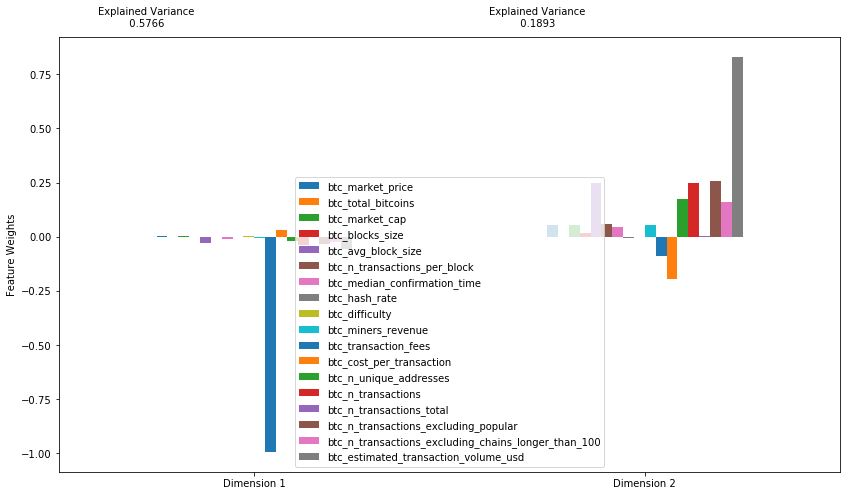

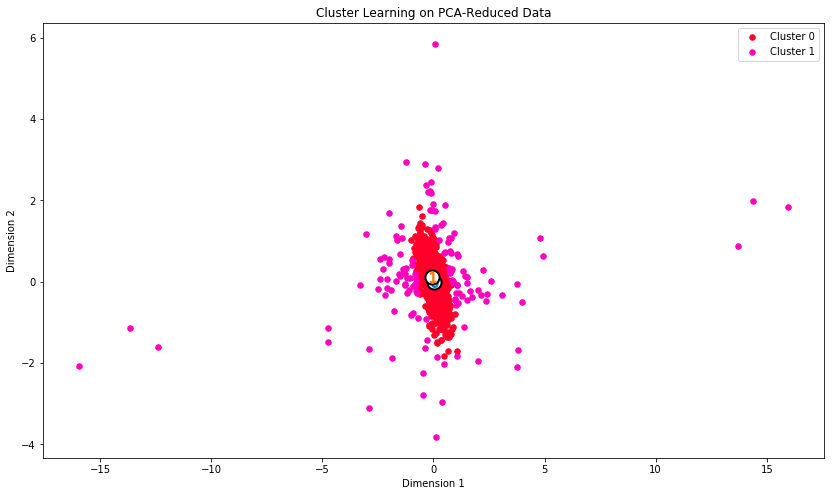

In [29]:
cluster_results(bitcoin_usl_data, preds, centers)
plt.show()

#### Benchmark model: bitcoin

In [30]:
yb = (bitcoin_dataset_short_log_diff['btc_market_price']).as_matrix(columns=None)
Xb = (bitcoin_dataset_short_log_diff.drop('btc_market_price', axis = 1)).as_matrix(columns=None)

In [31]:
Xb_train = Xb[1::2] 
yb_train = yb[1::2]
Xb_test = Xb[2::2]
yb_test = yb[2::2]

In [32]:
regressor = linear_model.LinearRegression()

In [33]:
regressor.fit(Xb_train, yb_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
yb_hat_x = regressor.predict(Xb_test)

In [35]:
mae = mean_absolute_error(yb_test, yb_hat_x)
rmse = np.sqrt(mean_squared_error(yb_test, yb_hat_x))
print("Test MAE: %.3f" % mae,"\n",'Test RMSE: %.3f' % rmse)

Test MAE: 0.001 
 Test RMSE: 0.004


### Data analysis: Etherium

In [37]:
eth_dataset_pd = pd.read_csv("/media/artemk/Data/Udacity/ML engineer/6/data/ethereum_dataset.csv", parse_dates=[0], index_col='Date')
eth_dataset_pd.replace(r'\s+', 0, regex=True)
eth_dataset_pd.drop(['UnixTimeStamp'], axis= 1, inplace=True)
eth_dataset_pd.drop(eth_dataset_pd.index[:13], inplace =True)

In [38]:
eth_dataset_pd.dtypes

eth_etherprice      float64
eth_tx                int64
eth_address           int64
eth_supply          float64
eth_marketcap       float64
eth_hashrate        float64
eth_difficulty      float64
eth_blocks            int64
eth_uncles            int64
eth_blocksize         int64
eth_blocktime       float64
eth_gasprice          int64
eth_gaslimit          int64
eth_gasused           int64
eth_ethersupply     float64
eth_ens_register      int64
dtype: object

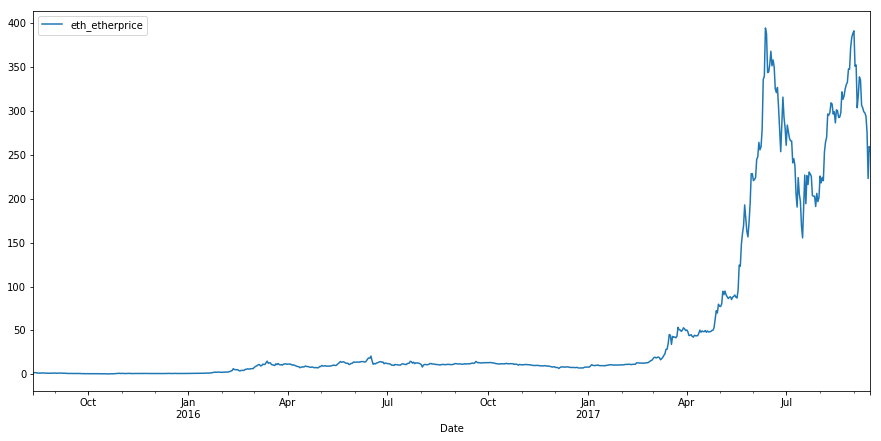

In [39]:
eth_dataset_pd.plot(y='eth_etherprice', figsize={7, 15})
plt.show()

In [41]:
eth_dataset_pd.corr(method='pearson', min_periods=1)

eth_etherprice    eth_tx  eth_address  eth_supply  \
eth_etherprice          1.000000  0.955109     0.915579    0.687886   
eth_tx                  0.955109  1.000000     0.970866    0.751909   
eth_address             0.915579  0.970866     1.000000    0.772205   
eth_supply              0.687886  0.751909     0.772205    1.000000   
eth_marketcap           0.999934  0.956567     0.918594    0.686228   
eth_hashrate            0.934797  0.974287     0.993075    0.729635   
eth_difficulty          0.903177  0.956646     0.985974    0.666363   
eth_blocks             -0.580499 -0.549251    -0.575713   -0.010507   
eth_uncles             -0.131209 -0.123873    -0.164989   -0.046534   
eth_blocksize           0.919823  0.975646     0.963704    0.664248   
eth_blocktime           0.616344  0.610827     0.652766    0.104828   
eth_gasprice           -0.116481 -0.154908    -0.144124   -0.303355   
eth_gaslimit            0.662732  0.721299     0.705609    0.526218   
eth_gasused             0.956289  0.985071     0.950390    0.716597   
eth_ethersupply        -0.564781 -0.533944    -0.566635   -0.019660   
eth_ens_register        0.731336  0.634061     0.555579    0.507788   

                  eth_marketcap  eth_hashrate  eth_difficulty  eth_blocks  \
eth_etherprice         0.999934      0.934797        0.903177   -0.580499   
eth_tx                 0.956567      0.974287        0.956646   -0.549251   
eth_address            0.918594      0.993075        0.985974   -0.575713   
eth_supply             0.686228      0.729635        0.666363   -0.010507   
eth_marketcap          1.000000      0.937514        0.907166   -0.586549   
eth_hashrate           0.937514      1.000000        0.987484   -0.619867   
eth_difficulty         0.907166      0.987484        1.000000   -0.666572   
eth_blocks            -0.586549     -0.619867       -0.666572    1.000000   
eth_uncles            -0.133100     -0.173889       -0.180930    0.307169   
eth_blocksize          0.922936      0.965012        0.973398   -0.630796   
eth_blocktime          0.623095      0.680358        0.738760   -0.980862   
eth_gasprice          -0.114695     -0.128893       -0.108065   -0.164745   
eth_gaslimit           0.663258      0.724678        0.711023   -0.323948   
eth_gasused            0.957470      0.959666        0.938364   -0.571488   
eth_ethersupply       -0.570769     -0.609115       -0.653766    0.987356   
eth_ens_register       0.726976      0.592332        0.507812   -0.320073   

                  eth_uncles  eth_blocksize  eth_blocktime  eth_gasprice  \
eth_etherprice     -0.131209       0.919823       0.616344     -0.116481   
eth_tx             -0.123873       0.975646       0.610827     -0.154908   
eth_address        -0.164989       0.963704       0.652766     -0.144124   
eth_supply         -0.046534       0.664248       0.104828     -0.303355   
eth_marketcap      -0.133100       0.922936       0.623095     -0.114695   
eth_hashrate       -0.173889       0.965012       0.680358     -0.128893   
eth_difficulty     -0.180930       0.973398       0.738760     -0.108065   
eth_blocks          0.307169      -0.630796      -0.980862     -0.164745   
eth_uncles          1.000000      -0.114237      -0.306143     -0.036737   
eth_blocksize      -0.114237       1.000000       0.698713     -0.118641   
eth_blocktime      -0.306143       0.698713       1.000000      0.131740   
eth_gasprice       -0.036737      -0.118641       0.131740      1.000000   
eth_gaslimit       -0.300821       0.687413       0.365956     -0.196964   
eth_gasused        -0.065189       0.962670       0.619710     -0.136293   
eth_ethersupply     0.452291      -0.608976      -0.969417     -0.161624   
eth_ens_register   -0.060959       0.553147       0.288426     -0.088007   

                  eth_gaslimit  eth_gasused  eth_ethersupply  eth_ens_register  
eth_etherprice        0.662732     0.956289        -0.564781          0.731336  
eth_tx                0.721299     0.985071  

In [42]:
eth_dataset_short=eth_dataset_pd.copy() #droping time series and a column with empty values to ensure PCA-compatability
eth_dataset_short.drop(["eth_uncles","eth_gasprice"], axis= 1, inplace=True)

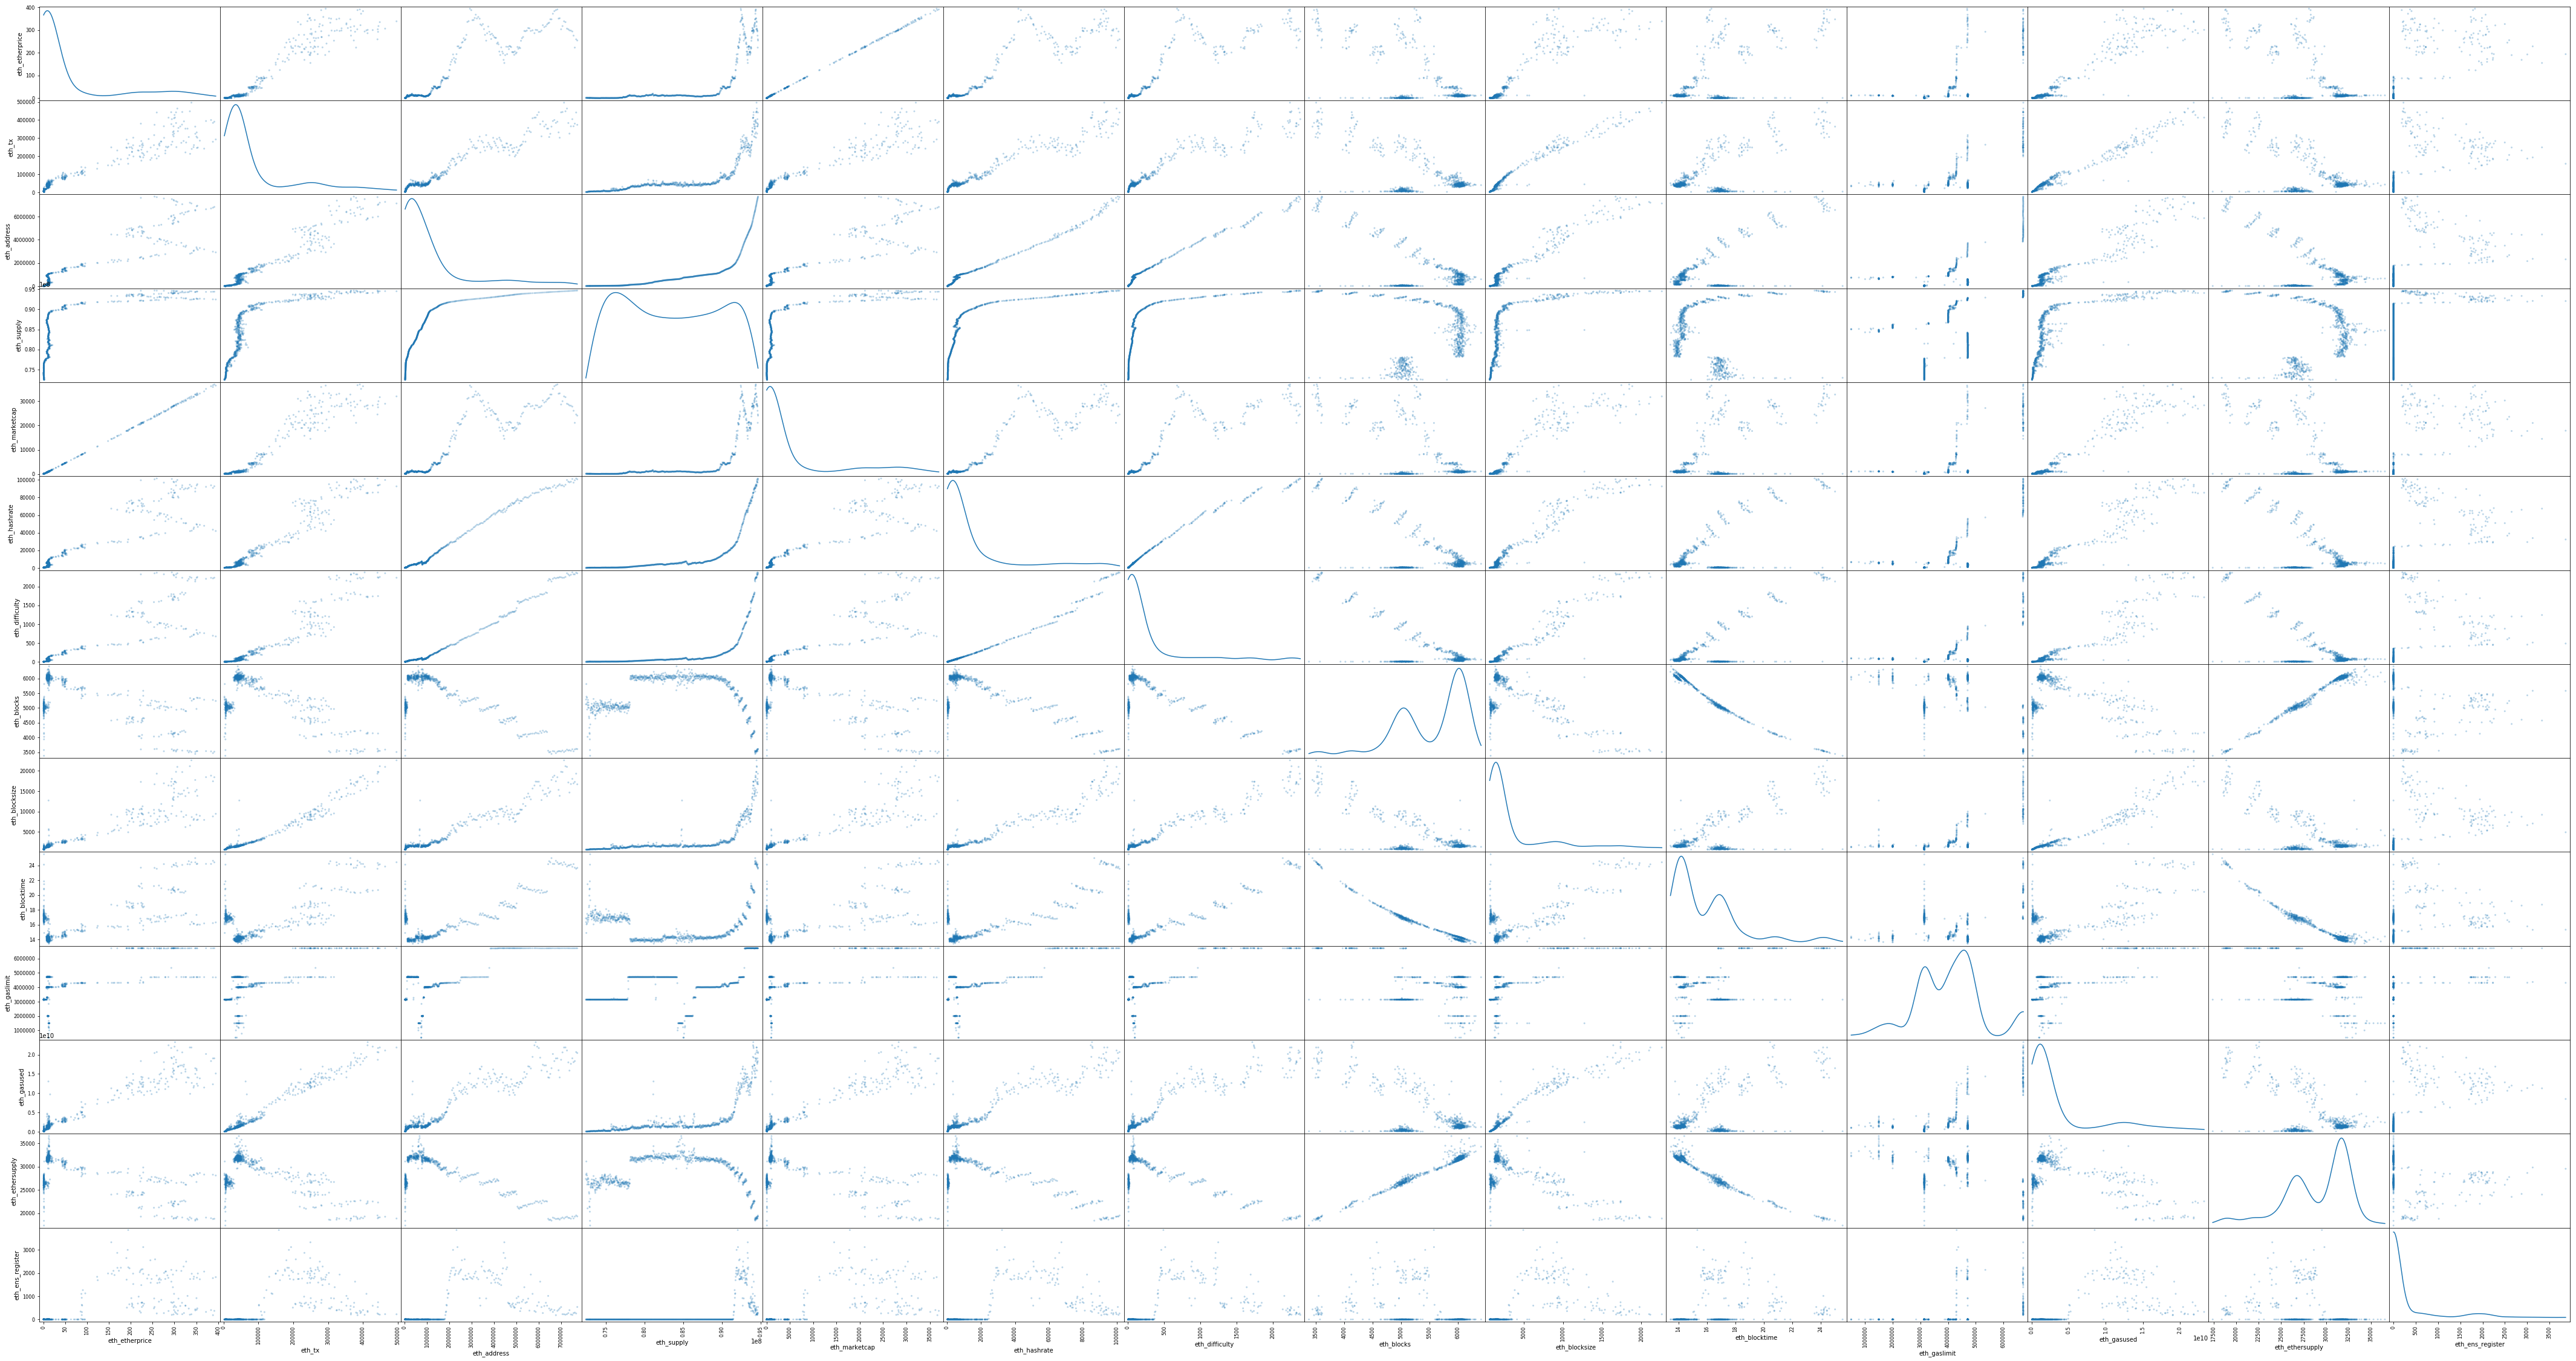

In [43]:
pd.plotting.scatter_matrix(eth_dataset_short, alpha = 0.3, figsize = (75,40), diagonal = 'kde')
plt.show()
plt.savefig('/media/artemk/Data/Udacity/ML engineer/6/graph2.png', dpi=300, bbox_inches='tight')

#### Differencing: etherium

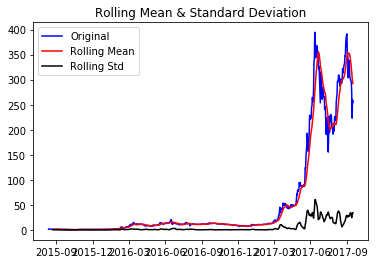

Results of Dickey-Fuller Test:
Test Statistic                  -2.356917
p-value                          0.154267
#Lags Used                      20.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


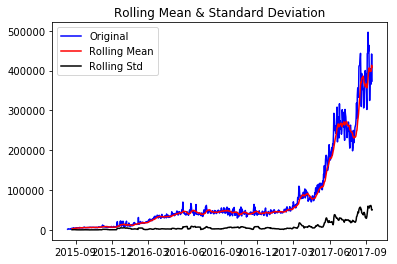

Results of Dickey-Fuller Test:
Test Statistic                   3.648298
p-value                          1.000000
#Lags Used                      20.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


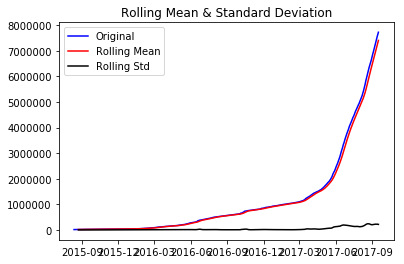

Results of Dickey-Fuller Test:
Test Statistic                   1.586027
p-value                          0.997815
#Lags Used                      20.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


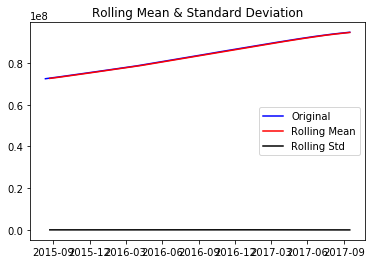

Results of Dickey-Fuller Test:
Test Statistic                  -3.621106
p-value                          0.005370
#Lags Used                      18.000000
Number of Observations Used    748.000000
Critical Value (1%)             -3.439123
Critical Value (5%)             -2.865412
Critical Value (10%)            -2.568832
dtype: float64


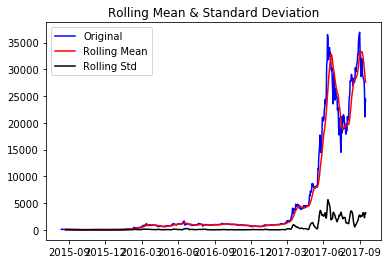

Results of Dickey-Fuller Test:
Test Statistic                  -2.340587
p-value                          0.159212
#Lags Used                      20.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


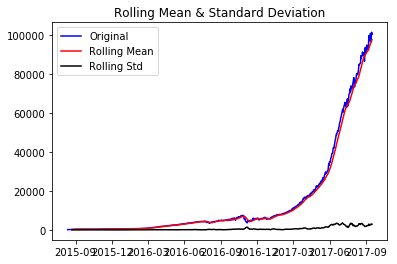

Results of Dickey-Fuller Test:
Test Statistic                   2.687325
p-value                          0.999086
#Lags Used                      20.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


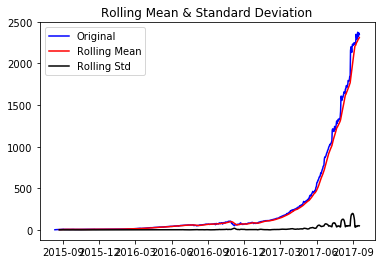

Results of Dickey-Fuller Test:
Test Statistic                   6.253545
p-value                          1.000000
#Lags Used                      19.000000
Number of Observations Used    747.000000
Critical Value (1%)             -3.439134
Critical Value (5%)             -2.865417
Critical Value (10%)            -2.568834
dtype: float64


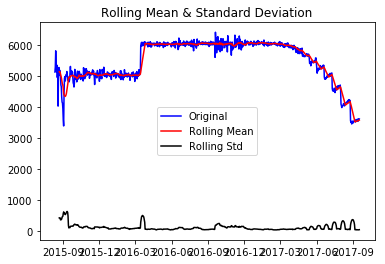

Results of Dickey-Fuller Test:
Test Statistic                   0.478428
p-value                          0.984202
#Lags Used                      17.000000
Number of Observations Used    749.000000
Critical Value (1%)             -3.439111
Critical Value (5%)             -2.865407
Critical Value (10%)            -2.568829
dtype: float64


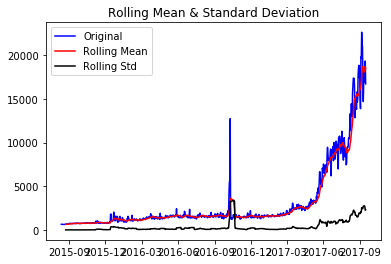

Results of Dickey-Fuller Test:
Test Statistic                   4.653374
p-value                          1.000000
#Lags Used                      20.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


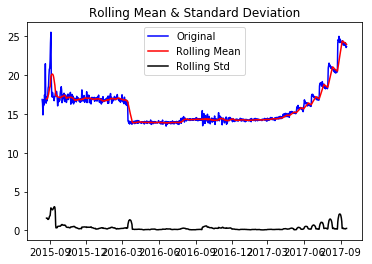

Results of Dickey-Fuller Test:
Test Statistic                   1.791680
p-value                          0.998332
#Lags Used                      20.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


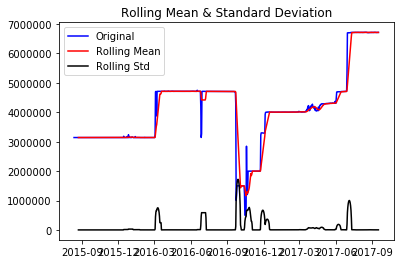

Results of Dickey-Fuller Test:
Test Statistic                  -1.200169
p-value                          0.673523
#Lags Used                       3.000000
Number of Observations Used    763.000000
Critical Value (1%)             -3.438950
Critical Value (5%)             -2.865335
Critical Value (10%)            -2.568791
dtype: float64


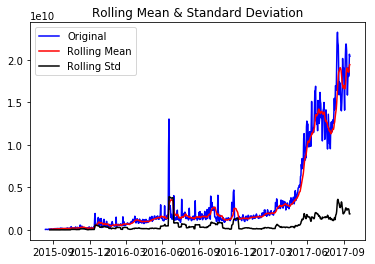

Results of Dickey-Fuller Test:
Test Statistic                   2.537636
p-value                          0.999061
#Lags Used                      19.000000
Number of Observations Used    747.000000
Critical Value (1%)             -3.439134
Critical Value (5%)             -2.865417
Critical Value (10%)            -2.568834
dtype: float64


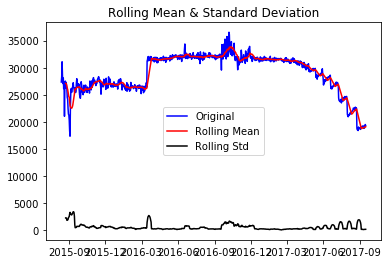

Results of Dickey-Fuller Test:
Test Statistic                   0.261915
p-value                          0.975528
#Lags Used                      20.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


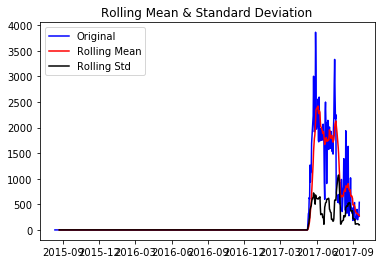

Results of Dickey-Fuller Test:
Test Statistic                  -2.277621
p-value                          0.179287
#Lags Used                      11.000000
Number of Observations Used    755.000000
Critical Value (1%)             -3.439041
Critical Value (5%)             -2.865376
Critical Value (10%)            -2.568813
dtype: float64


eth_etherprice      None
eth_tx              None
eth_address         None
eth_supply          None
eth_marketcap       None
eth_hashrate        None
eth_difficulty      None
eth_blocks          None
eth_blocksize       None
eth_blocktime       None
eth_gaslimit        None
eth_gasused         None
eth_ethersupply     None
eth_ens_register    None
dtype: object

In [44]:
eth_dataset_short.apply(test_stationarity, axis=0)

In [45]:
eth_dataset_short_log = eth_dataset_short.apply(np.log, axis=0).replace(to_replace=[-np.inf], value=0)
eth_short_log_diff = eth_dataset_short_log.diff(periods=2, axis=0)

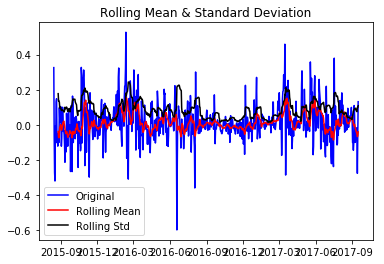

Results of Dickey-Fuller Test:
Test Statistic                  -3.898398
p-value                          0.002047
#Lags Used                      20.000000
Number of Observations Used    744.000000
Critical Value (1%)             -3.439170
Critical Value (5%)             -2.865433
Critical Value (10%)            -2.568843
dtype: float64


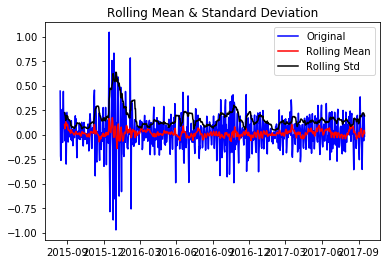

Results of Dickey-Fuller Test:
Test Statistic                -6.995634e+00
p-value                        7.546636e-10
#Lags Used                     2.000000e+01
Number of Observations Used    7.440000e+02
Critical Value (1%)           -3.439170e+00
Critical Value (5%)           -2.865433e+00
Critical Value (10%)          -2.568843e+00
dtype: float64


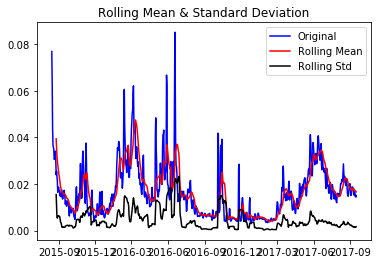

Results of Dickey-Fuller Test:
Test Statistic                  -2.749042
p-value                          0.065929
#Lags Used                      20.000000
Number of Observations Used    744.000000
Critical Value (1%)             -3.439170
Critical Value (5%)             -2.865433
Critical Value (10%)            -2.568843
dtype: float64


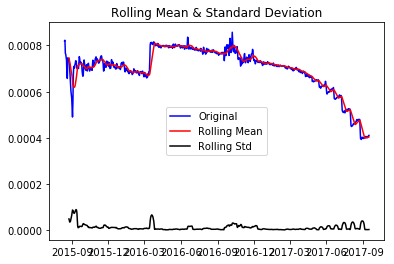

Results of Dickey-Fuller Test:
Test Statistic                   2.744984
p-value                          1.000000
#Lags Used                      20.000000
Number of Observations Used    744.000000
Critical Value (1%)             -3.439170
Critical Value (5%)             -2.865433
Critical Value (10%)            -2.568843
dtype: float64


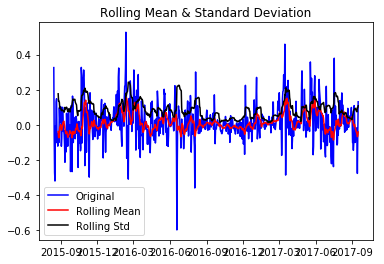

Results of Dickey-Fuller Test:
Test Statistic                  -3.898253
p-value                          0.002048
#Lags Used                      20.000000
Number of Observations Used    744.000000
Critical Value (1%)             -3.439170
Critical Value (5%)             -2.865433
Critical Value (10%)            -2.568843
dtype: float64


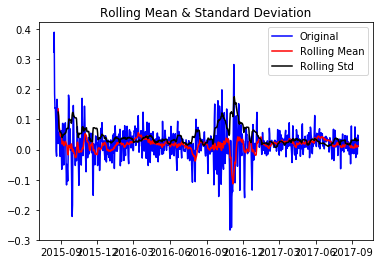

Results of Dickey-Fuller Test:
Test Statistic                  -5.373314
p-value                          0.000004
#Lags Used                      20.000000
Number of Observations Used    744.000000
Critical Value (1%)             -3.439170
Critical Value (5%)             -2.865433
Critical Value (10%)            -2.568843
dtype: float64


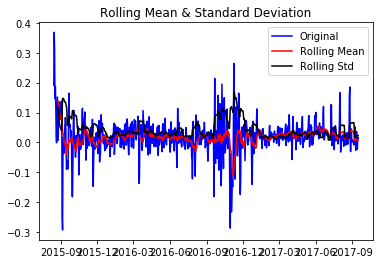

Results of Dickey-Fuller Test:
Test Statistic                -7.516293e+00
p-value                        3.895354e-11
#Lags Used                     1.700000e+01
Number of Observations Used    7.470000e+02
Critical Value (1%)           -3.439134e+00
Critical Value (5%)           -2.865417e+00
Critical Value (10%)          -2.568834e+00
dtype: float64


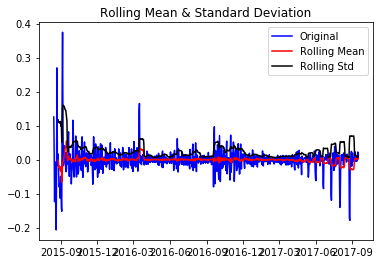

Results of Dickey-Fuller Test:
Test Statistic                -9.023989e+00
p-value                        5.675028e-15
#Lags Used                     1.500000e+01
Number of Observations Used    7.490000e+02
Critical Value (1%)           -3.439111e+00
Critical Value (5%)           -2.865407e+00
Critical Value (10%)          -2.568829e+00
dtype: float64


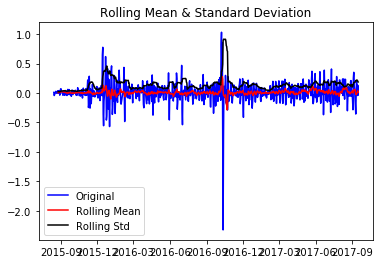

Results of Dickey-Fuller Test:
Test Statistic                -7.490730e+00
p-value                        4.512945e-11
#Lags Used                     2.000000e+01
Number of Observations Used    7.440000e+02
Critical Value (1%)           -3.439170e+00
Critical Value (5%)           -2.865433e+00
Critical Value (10%)          -2.568843e+00
dtype: float64


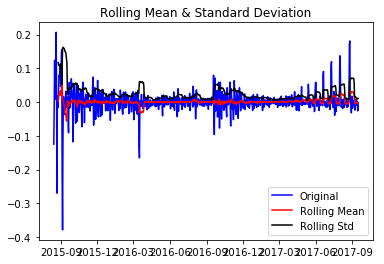

Results of Dickey-Fuller Test:
Test Statistic                -8.869266e+00
p-value                        1.412476e-14
#Lags Used                     1.500000e+01
Number of Observations Used    7.490000e+02
Critical Value (1%)           -3.439111e+00
Critical Value (5%)           -2.865407e+00
Critical Value (10%)          -2.568829e+00
dtype: float64


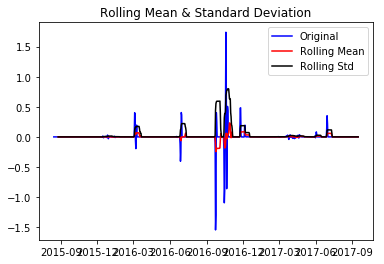

Results of Dickey-Fuller Test:
Test Statistic                  -5.082649
p-value                          0.000015
#Lags Used                      20.000000
Number of Observations Used    744.000000
Critical Value (1%)             -3.439170
Critical Value (5%)             -2.865433
Critical Value (10%)            -2.568843
dtype: float64


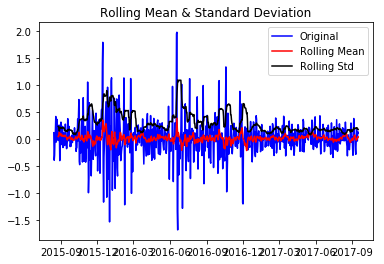

Results of Dickey-Fuller Test:
Test Statistic                -7.847074e+00
p-value                        5.731245e-12
#Lags Used                     2.000000e+01
Number of Observations Used    7.440000e+02
Critical Value (1%)           -3.439170e+00
Critical Value (5%)           -2.865433e+00
Critical Value (10%)          -2.568843e+00
dtype: float64


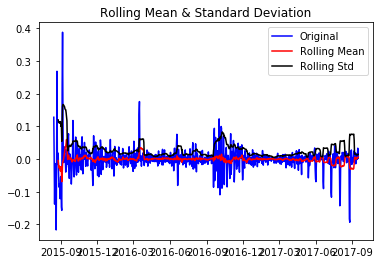

Results of Dickey-Fuller Test:
Test Statistic                -9.315291e+00
p-value                        1.023054e-15
#Lags Used                     1.500000e+01
Number of Observations Used    7.490000e+02
Critical Value (1%)           -3.439111e+00
Critical Value (5%)           -2.865407e+00
Critical Value (10%)          -2.568829e+00
dtype: float64


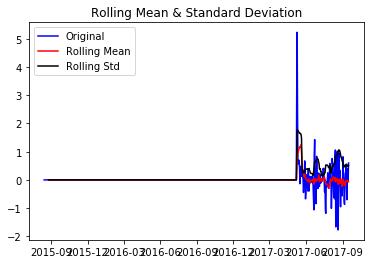

Results of Dickey-Fuller Test:
Test Statistic                  -5.356349
p-value                          0.000004
#Lags Used                      20.000000
Number of Observations Used    744.000000
Critical Value (1%)             -3.439170
Critical Value (5%)             -2.865433
Critical Value (10%)            -2.568843
dtype: float64


eth_etherprice      None
eth_tx              None
eth_address         None
eth_supply          None
eth_marketcap       None
eth_hashrate        None
eth_difficulty      None
eth_blocks          None
eth_blocksize       None
eth_blocktime       None
eth_gaslimit        None
eth_gasused         None
eth_ethersupply     None
eth_ens_register    None
dtype: object

In [46]:
eth_short_log_diff.dropna(inplace=True)
eth_short_log_diff.apply(test_stationarity, axis=0)

#### PCA and unsupervised learning: etherium

In [47]:
pca = PCA(n_components=2, random_state=0)
pca.fit(eth_short_log_diff)

# Generate PCA results plot
eth_pca_results = pca_results(eth_short_log_diff, pca)

In [48]:
print (eth_pca_results)

             Explained Variance  eth_etherprice  eth_tx  eth_address  \
Dimension 1              0.4671          0.0172  0.3874       0.0029   
Dimension 2              0.3041         -0.0008 -0.0033       0.0007   

             eth_supply  eth_marketcap  eth_hashrate  eth_difficulty  \
Dimension 1        -0.0         0.0172       -0.0047         -0.0033   
Dimension 2        -0.0        -0.0008        0.0045          0.0019   

             eth_blocks  eth_blocksize  eth_blocktime  eth_gaslimit  \
Dimension 1     -0.0031         0.3359         0.0006        0.0507   
Dimension 2      0.0018         0.0083        -0.0024        0.0010   

             eth_gasused  eth_ethersupply  eth_ens_register  
Dimension 1       0.8564           0.0119           -0.0177  
Dimension 2       0.0189           0.0014            0.9998  


In [49]:
eth_dataset_pca = pca.transform(eth_short_log_diff)

In [50]:
for possible_clusters_number in range(2,20):
    clusterer = mixture.GaussianMixture(n_components=possible_clusters_number, random_state=0).fit(eth_dataset_pca)
    preds = clusterer.predict(eth_dataset_pca)
    centers = clusterer.means_
    score = metrics.silhouette_score(eth_dataset_pca, preds)
    print ("For n_clusters =", possible_clusters_number,"the average silhouette_score is :", score)

For n_clusters = 2 the average silhouette_score is : 0.274464323572
For n_clusters = 3 the average silhouette_score is : 0.206703597675
For n_clusters = 4 the average silhouette_score is : 0.275653005191
For n_clusters = 5 the average silhouette_score is : 0.256080707098
For n_clusters = 6 the average silhouette_score is : 0.0696210964257
For n_clusters = 7 the average silhouette_score is : -0.211023752542
For n_clusters = 8 the average silhouette_score is : -0.21410051795
For n_clusters = 9 the average silhouette_score is : -0.277740698521
For n_clusters = 10 the average silhouette_score is : -0.263315335119
For n_clusters = 11 the average silhouette_score is : -0.0428931133647
For n_clusters = 12 the average silhouette_score is : 0.0416348807991
For n_clusters = 13 the average silhouette_score is : -0.0241008109089
For n_clusters = 14 the average silhouette_score is : -0.0597454961547
For n_clusters = 15 the average silhouette_score is : -0.130738546035
For n_clusters = 16 the averag

In [51]:
for possible_clusters_number in range(2,20):
    clusterer = cluster.KMeans(n_clusters=possible_clusters_number, random_state=0).fit(eth_dataset_pca)
    preds = clusterer.predict(eth_dataset_pca)
    score = metrics.silhouette_score(eth_dataset_pca, preds)
    print ("For n_clusters =", possible_clusters_number,"the average silhouette_score is :", score)

For n_clusters = 2 the average silhouette_score is : 0.395594302266
For n_clusters = 3 the average silhouette_score is : 0.408183723671
For n_clusters = 4 the average silhouette_score is : 0.437268898063
For n_clusters = 5 the average silhouette_score is : 0.430711057343
For n_clusters = 6 the average silhouette_score is : 0.46137028426
For n_clusters = 7 the average silhouette_score is : 0.50018963094
For n_clusters = 8 the average silhouette_score is : 0.471829848815
For n_clusters = 9 the average silhouette_score is : 0.472479227683
For n_clusters = 10 the average silhouette_score is : 0.471981850707
For n_clusters = 11 the average silhouette_score is : 0.474386870961
For n_clusters = 12 the average silhouette_score is : 0.461603988774
For n_clusters = 13 the average silhouette_score is : 0.471041342547
For n_clusters = 14 the average silhouette_score is : 0.477399893831
For n_clusters = 15 the average silhouette_score is : 0.455089112437
For n_clusters = 16 the average silhouette_s

In [52]:
clusterer = mixture.GaussianMixture(n_components=2, random_state=0).fit(eth_dataset_pca)
preds = clusterer.predict(eth_dataset_pca)
centers = clusterer.means_
score = metrics.silhouette_score(eth_dataset_pca, preds)

In [53]:
eth_usl_data = pd.DataFrame(eth_dataset_pca, columns = ['Dimension 1', 'Dimension 2'])

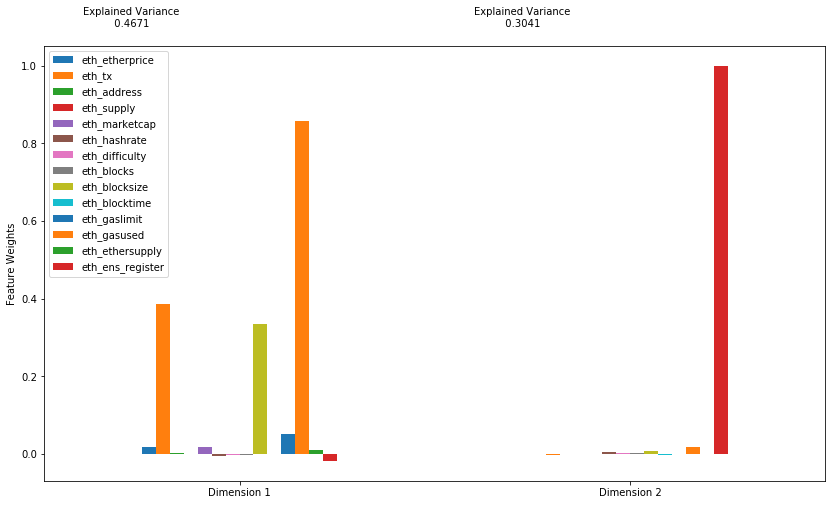

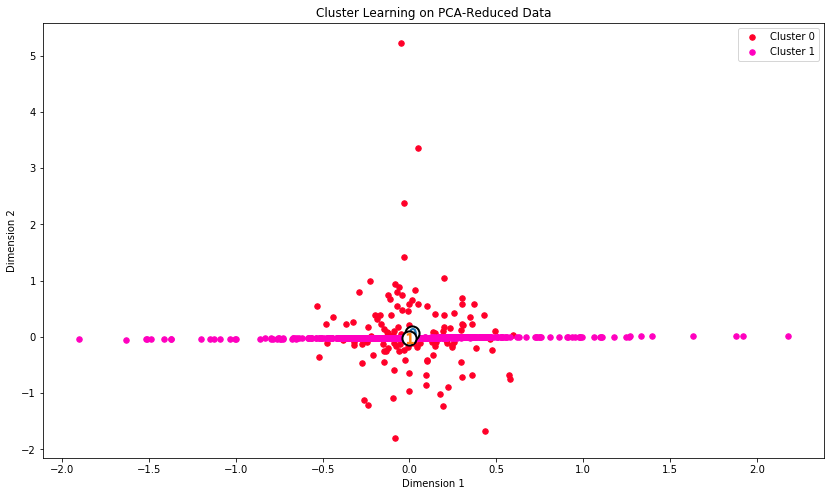

In [54]:
cluster_results(eth_usl_data, preds, centers)
plt.show()

#### Benchmark model: etherium

In [55]:
ye = (eth_short_log_diff['eth_etherprice']).as_matrix(columns=None)
Xe = (eth_short_log_diff.drop('eth_etherprice', axis = 1)).as_matrix(columns=None)

In [56]:
Xe_train = Xe[1::2] 
ye_train = ye[1::2]
Xe_test = Xe[2::2]
ye_test = ye[2::2]

In [57]:
regressor = linear_model.LinearRegression()

In [58]:
regressor.fit(Xe_train, ye_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
ye_hat_x = regressor.predict(Xe_test)

In [60]:
mae = mean_absolute_error(ye_test, ye_hat_x)
rmse = np.sqrt(mean_squared_error(ye_test, ye_hat_x))
print("Test MAE: %.3f" % mae,"\n",'Test RMSE: %.3f' % rmse)

Test MAE: 0.000 
 Test RMSE: 0.000


### LSTM for bitcoin

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
from sklearn import preprocessing
import random
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [62]:
bitcoin_dataset_dl = pd.read_csv("/media/artemk/Data/Udacity/ML engineer/6/data/bitcoin_dataset.csv")
bitcoin_dataset_dl.drop(bitcoin_dataset_dl.index[:297], inplace =True)
bitcoin_dataset_dl.reset_index(drop=True, inplace=True)
bitcoin_dataset_dl.set_index('Date', inplace=True)
#yes, we import dataset once again. The data preparation procedure is completly different from what was done in
#previous chapter.

In [63]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True): #adopted from [52]
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
#the function that tranforms the caclulats the differences between the current day values (t) and the values of the previous day 

In [64]:
values = bitcoin_dataset_dl.values

In [65]:
encoder = preprocessing.LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
#encoding normalizing labels

In [66]:
values = values.astype('float32')
#ensuaring that all values are float

In [67]:
np.nan_to_num(values,copy=False)
np.any(np.isnan(values))
#replacing all NaNs with numerical 0 and performing a check

False

In [68]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
#normalizing data

In [69]:
reframed = series_to_supervised(scaled, 1, 1)
#applying the series_to_supervised function

In [70]:
values_keys = list(reframed.columns.values)
values_values = list(range(0,(len(values_keys)),1))
values_dictionary = dict(zip(values_keys, values_values))
print(values_dictionary)
#creating an overview of newly made variables and their indexes

{'var1(t-1)': 0, 'var2(t-1)': 1, 'var3(t-1)': 2, 'var4(t-1)': 3, 'var5(t-1)': 4, 'var6(t-1)': 5, 'var7(t-1)': 6, 'var8(t-1)': 7, 'var9(t-1)': 8, 'var10(t-1)': 9, 'var11(t-1)': 10, 'var12(t-1)': 11, 'var13(t-1)': 12, 'var14(t-1)': 13, 'var15(t-1)': 14, 'var16(t-1)': 15, 'var17(t-1)': 16, 'var18(t-1)': 17, 'var19(t-1)': 18, 'var20(t-1)': 19, 'var21(t-1)': 20, 'var22(t-1)': 21, 'var23(t-1)': 22, 'var1(t)': 23, 'var2(t)': 24, 'var3(t)': 25, 'var4(t)': 26, 'var5(t)': 27, 'var6(t)': 28, 'var7(t)': 29, 'var8(t)': 30, 'var9(t)': 31, 'var10(t)': 32, 'var11(t)': 33, 'var12(t)': 34, 'var13(t)': 35, 'var14(t)': 36, 'var15(t)': 37, 'var16(t)': 38, 'var17(t)': 39, 'var18(t)': 40, 'var19(t)': 41, 'var20(t)': 42, 'var21(t)': 43, 'var22(t)': 44, 'var23(t)': 45}


In [71]:
reframed.drop(reframed.columns[[list(range(24, 45+1))]], axis=1, inplace=True)
#removing unrequired variables. In this case we want to predict only bitcoin price, thus we leave all t-1 variables for 
#training and variable t (the price), which are going to predict

In [72]:
#print(reframed)

In [73]:
btcdl_values = reframed.values

In [74]:
#q,w,e,r = np.split(values, 4)
#train = np.concatenate((q, e), axis=0)
#test = np.concatenate((w, r), axis=0)

In [75]:
btcdl_train=btcdl_values[1::2]
btcdl_test=btcdl_values[2::2]
#creating a test/train dataset. Although looking pretty innocent, this is a decision that heavily influences the
#robustness of the model. Please refer to the report. 

In [76]:
btcdl_train_X, btcdl_train_y = btcdl_train[:, :-1], btcdl_train[:, -1]
btcdl_test_X, btcdl_test_y = btcdl_test[:, :-1], btcdl_test[:, -1]
btcdl_train_X = btcdl_train_X.reshape((btcdl_train_X.shape[0], 1, btcdl_train_X.shape[1]))
btcdl_test_X = btcdl_test_X.reshape((btcdl_test_X.shape[0], 1, btcdl_test_X.shape[1]))
print(btcdl_train_X.shape, btcdl_train_y.shape, btcdl_test_X.shape, btcdl_test_y.shape)
#reshaping the train and test to fit the 3D input of LSTM

(646, 1, 23) (646,) (645, 1, 23) (645,)


In [77]:
stopper = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
#creating a callback function, because we do not have all day

Train on 646 samples, validate on 645 samples
Epoch 1/100
0s - loss: 0.0514 - val_loss: 0.1387
Epoch 2/100
0s - loss: 0.0677 - val_loss: 0.0650
Epoch 3/100
0s - loss: 0.0473 - val_loss: 0.0403
Epoch 4/100
0s - loss: 0.0438 - val_loss: 0.0324
Epoch 5/100
0s - loss: 0.0375 - val_loss: 0.0290
Epoch 6/100
0s - loss: 0.0327 - val_loss: 0.0281
Epoch 7/100
0s - loss: 0.0278 - val_loss: 0.0318
Epoch 8/100
0s - loss: 0.0231 - val_loss: 0.0292
Epoch 9/100
0s - loss: 0.0194 - val_loss: 0.0206
Epoch 10/100
0s - loss: 0.0169 - val_loss: 0.0186
Epoch 11/100
0s - loss: 0.0196 - val_loss: 0.0354
Epoch 12/100
0s - loss: 0.0208 - val_loss: 0.0289
Epoch 13/100
0s - loss: 0.0195 - val_loss: 0.0206
Epoch 14/100
0s - loss: 0.0158 - val_loss: 0.0237
Epoch 15/100
0s - loss: 0.0161 - val_loss: 0.0156
Epoch 16/100
0s - loss: 0.0163 - val_loss: 0.0216
Epoch 17/100
0s - loss: 0.0144 - val_loss: 0.0149
Epoch 18/100
0s - loss: 0.0142 - val_loss: 0.0172
Epoch 19/100
0s - loss: 0.0129 - val_loss: 0.0141
Epoch 20/100


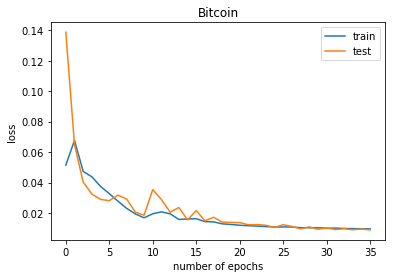

In [78]:
# designing the LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(btcdl_train_X.shape[1], btcdl_train_X.shape[2]),return_sequences=True))
model.add(LSTM(75,return_sequences=True))
model.add(LSTM(20,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adagrad')
# training the model
LSTM_training = model.fit(btcdl_train_X, btcdl_train_y, epochs=100, batch_size=72, validation_data=(btcdl_test_X, btcdl_test_y), verbose=2, shuffle=False, callbacks=[stopper] )
# plot history
pyplot.plot(LSTM_training.history['loss'], label='train')
pyplot.plot(LSTM_training.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.title("Bitcoin")
pyplot.legend()
pyplot.show()

In [79]:
#make a prediction
yhat = model.predict(btcdl_test_X)
btcdl_test_X = btcdl_test_X.reshape((btcdl_test_X.shape[0], btcdl_test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, btcdl_test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
btcdl_test_y = btcdl_test_y.reshape((len(btcdl_test_y), 1))
inv_y = concatenate((btcdl_test_y, btcdl_test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate metrics
mae = mean_absolute_error(inv_y, inv_yhat)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print("Test MAE: %.3f" % mae,"\n",'Test RMSE: %.3f' % rmse)

Test MAE: 42.476 
 Test RMSE: 85.527


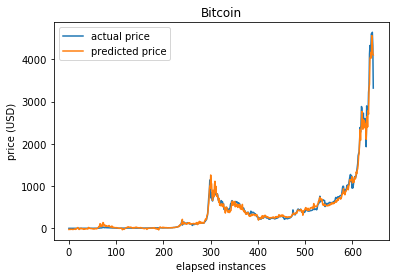

In [80]:
plt.plot(inv_y, label='actual price')
plt.plot(inv_yhat, label='predicted price')
plt.ylabel('price (USD)')
plt.xlabel('elapsed instances')
plt.title("Bitcoin")
plt.legend()
plt.show()

In [81]:
inv_y_btc_dl = np.diff(np.diff(np.log(inv_y)))
inv_yhat_btc_dl = np.diff(np.diff(np.nan_to_num(np.log(inv_yhat))))
#re-scaling the LSTM outputs to comapre to the becnhmark model

/home/artemk/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [82]:
mae = mean_absolute_error(inv_y_btc_dl, inv_yhat_btc_dl)
rmse = sqrt(mean_squared_error(inv_y_btc_dl, inv_yhat_btc_dl))
print("Test MAE: %.3f" % mae,"\n",'Test RMSE: %.3f' % rmse)

Test MAE: 0.391 
 Test RMSE: 0.896


### LSTM for Etherium

In [83]:
eth_dataset_dl = pd.read_csv("/media/artemk/Data/Udacity/ML engineer/6/data/ethereum_dataset.csv", parse_dates=[0], index_col='Date')
eth_dataset_dl.replace(r'\s+', 0, regex=True)
eth_dataset_dl.drop(['UnixTimeStamp'], axis= 1, inplace=True)
eth_dataset_dl.drop(eth_dataset_dl.index[:13], inplace =True)

In [84]:
eth_values = eth_dataset_dl.values

In [85]:
encoder = preprocessing.LabelEncoder()
eth_values[:,4] = encoder.fit_transform(eth_values[:,4])
#encoding normalizing labels

In [86]:
eth_values = eth_values.astype('float32')
#ensuaring that all values are float

In [87]:
np.nan_to_num(eth_values,copy=False)
np.any(np.isnan(eth_values))
#replacing all NaNs with numerical 0 and performing a check

False

In [88]:
eth_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
eth_scaled = eth_scaler.fit_transform(eth_values)
#normalizing data

In [89]:
eth_reframed = series_to_supervised(eth_scaled, 1, 1)
#applying the series_to_supervised function

In [90]:
eth_values_keys = list(eth_reframed.columns.values)
eth_values_values = list(range(0,(len(eth_values_keys)),1))
eth_values_dictionary = dict(zip(eth_values_keys, eth_values_values))
print(eth_values_dictionary)
#creating an overview of newly made variables and their indexes

{'var1(t-1)': 0, 'var2(t-1)': 1, 'var3(t-1)': 2, 'var4(t-1)': 3, 'var5(t-1)': 4, 'var6(t-1)': 5, 'var7(t-1)': 6, 'var8(t-1)': 7, 'var9(t-1)': 8, 'var10(t-1)': 9, 'var11(t-1)': 10, 'var12(t-1)': 11, 'var13(t-1)': 12, 'var14(t-1)': 13, 'var15(t-1)': 14, 'var16(t-1)': 15, 'var1(t)': 16, 'var2(t)': 17, 'var3(t)': 18, 'var4(t)': 19, 'var5(t)': 20, 'var6(t)': 21, 'var7(t)': 22, 'var8(t)': 23, 'var9(t)': 24, 'var10(t)': 25, 'var11(t)': 26, 'var12(t)': 27, 'var13(t)': 28, 'var14(t)': 29, 'var15(t)': 30, 'var16(t)': 31}


In [91]:
eth_reframed.drop(eth_reframed.columns[[list(range(17, 31+1))]], axis=1, inplace=True)
#removing unrequired variables. In this case we want to predict only bitcoin price, thus we leave all t-1 variables for 
#training and variable t (the price), which are going to predict

In [92]:
ethdl_values = eth_reframed.values

In [93]:
#q,w,e,r = np.split(values, 4)
#train = np.concatenate((q, e), axis=0)
#test = np.concatenate((w, r), axis=0)

In [94]:
ethdl_train=ethdl_values[1::2]
ethdl_test=ethdl_values[2::2]

In [95]:
ethdl_train_X, ethdl_train_y = ethdl_train[:, :-1], ethdl_train[:, -1]
ethdl_test_X, ethdl_test_y = ethdl_test[:, :-1], ethdl_test[:, -1]
ethdl_train_X = ethdl_train_X.reshape((ethdl_train_X.shape[0], 1, ethdl_train_X.shape[1]))
ethdl_test_X = ethdl_test_X.reshape((ethdl_test_X.shape[0], 1, ethdl_test_X.shape[1]))
print(ethdl_train_X.shape, ethdl_train_y.shape, ethdl_test_X.shape, ethdl_test_y.shape)
#reshaping the train and test to fit the 3D input of LSTM

(383, 1, 16) (383,) (382, 1, 16) (382,)


In [96]:
stopper = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

Train on 383 samples, validate on 382 samples
Epoch 1/100
0s - loss: 0.1251 - val_loss: 0.1254
Epoch 2/100
0s - loss: 0.1243 - val_loss: 0.1167
Epoch 3/100
0s - loss: 0.1142 - val_loss: 0.0948
Epoch 4/100
0s - loss: 0.0855 - val_loss: 0.0719
Epoch 5/100
0s - loss: 0.0524 - val_loss: 0.0661
Epoch 6/100
0s - loss: 0.0534 - val_loss: 0.0438
Epoch 7/100
0s - loss: 0.0320 - val_loss: 0.0433
Epoch 8/100
0s - loss: 0.0400 - val_loss: 0.0315
Epoch 9/100
0s - loss: 0.0296 - val_loss: 0.0340
Epoch 10/100
0s - loss: 0.0346 - val_loss: 0.0283
Epoch 11/100
0s - loss: 0.0309 - val_loss: 0.0331
Epoch 12/100
0s - loss: 0.0336 - val_loss: 0.0278
Epoch 13/100
0s - loss: 0.0297 - val_loss: 0.0317
Epoch 14/100
0s - loss: 0.0320 - val_loss: 0.0270
Epoch 15/100
0s - loss: 0.0292 - val_loss: 0.0305
Epoch 16/100
0s - loss: 0.0306 - val_loss: 0.0267
Epoch 17/100
0s - loss: 0.0284 - val_loss: 0.0306
Epoch 18/100
0s - loss: 0.0300 - val_loss: 0.0259
Epoch 19/100
0s - loss: 0.0273 - val_loss: 0.0284
Epoch 20/100


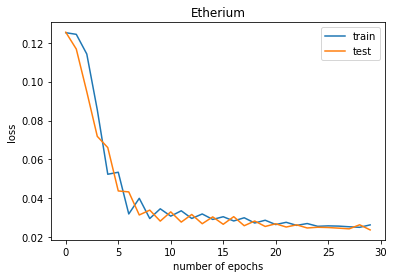

In [97]:
# designing the LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(ethdl_train_X.shape[1], ethdl_train_X.shape[2]),return_sequences=True))
model.add(LSTM(75,return_sequences=True))
model.add(LSTM(20,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adagrad')
# training the model
LSTM_training = model.fit(ethdl_train_X, ethdl_train_y, epochs=100, batch_size=72, validation_data=(ethdl_test_X, ethdl_test_y), verbose=2, shuffle=False, callbacks=[stopper] )
# plot history
pyplot.plot(LSTM_training.history['loss'], label='train')
pyplot.plot(LSTM_training.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.title("Etherium")
pyplot.legend()
pyplot.show()

In [98]:
yhat = model.predict(ethdl_test_X)
ethdl_test_X = ethdl_test_X.reshape((ethdl_test_X.shape[0], ethdl_test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, ethdl_test_X[:, 1:]), axis=1)
inv_yhat = eth_scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
ethdl_test_y = ethdl_test_y.reshape((len(ethdl_test_y), 1))
inv_y = concatenate((ethdl_test_y, ethdl_test_X[:, 1:]), axis=1)
inv_y = eth_scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae = mean_absolute_error(inv_y, inv_yhat)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print("Test MAE: %.3f" % mae,"\n",'Test RMSE: %.3f' % rmse)

Test MAE: 9.378 
 Test RMSE: 20.529


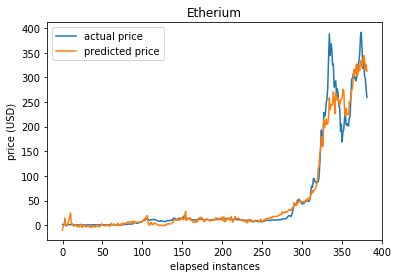

In [99]:
plt.plot(inv_y, label='actual price')
plt.plot(inv_yhat, label='predicted price')
plt.title("Etherium")
plt.ylabel('price (USD)')
plt.xlabel('elapsed instances')
plt.legend()
plt.show()

In [100]:
inv_y_eth_dl = np.diff(np.diff(np.nan_to_num(np.log(inv_y))))
inv_yhat_eth_dl = np.diff(np.diff(np.nan_to_num(np.log(inv_yhat))))
#re-scaling the LSTM outputs to comapre to the becnhmark model

/home/artemk/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [101]:
mae = mean_absolute_error(inv_y_eth_dl, inv_yhat_eth_dl)
rmse = sqrt(mean_squared_error(inv_y_eth_dl, inv_yhat_eth_dl))
print("Test MAE: %.3f" % mae,"\n",'Test RMSE: %.3f' % rmse)

Test MAE: 0.448 
 Test RMSE: 0.826
